# Capstone II Final Sheet

This sheet consists of all the steps performed for this Data Science project. 

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 

4.   Pre-processing and Training Data Development

5.   Modeling 

6.   Documentation

<h3>1. Problem Identification

<B><ul>
<li>We have dataset of Portugal bank marketing campaigns results   
<li>Conducted campaigns are based mostly on direct phone calls, offering bank client to place a term deposit
<li>After all marking efforts client had agreed to place deposit
<li> As a result of campaigns, we have target variable marked 'yes', otherwise 'no'
<li>So we need to predict future results of marketing companies based on available statistics to identify potential customers
<li>Therefore, we need to classify the client will subscribe a bank term deposit or not for future campaign, to identify success of Bank Telemarketing


<h3>2. Data Wrangling

  * Data Collection
      - Locating the data
      - Data loading
      - Data joining
   * Data Organization
      -  File structure
      -  Git & Github
  * Data Definition
      - Column names
      - Data types (numeric, categorical, timestamp, etc.)
      - Description of the columns
      - Count or percent per unique values or codes (including NA)
      - The range of values or codes  
  * Data Cleaning
      - NA or missing data
      - Duplicates

<B>Load Python Packages

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score,f1_score,plot_precision_recall_curve
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier as svm
from sklearn.linear_model import RidgeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.under_sampling import RandomUnderSampler 
from sklearn import metrics
%matplotlib inline


<B>Import data</B>

In [2]:
#Load the data from CSV
df=pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';',low_memory=False)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Get details of Data and update datatypes as per requirement

In [3]:
#Get the size of data
df.shape

(41188, 21)

In [4]:
#Get datatypes
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
#count of unique values for every column, regardless of data type.
pd.Series({col: len(pd.unique(df[col])) for col in df})

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

Here Unique counts for maximum variables are very less. By seeing above features and unqiue values, it is expected there will very less unique values. For eg.Marital status is expected to of 4 categories.

In [6]:
#percent of unique values per column
pd.Series({col: df[col].nunique()/len(df[col])*100 for col in df})

age               0.189376
job               0.029135
marital           0.009712
education         0.019423
default           0.007284
housing           0.007284
loan              0.007284
contact           0.004856
month             0.024279
day_of_week       0.012139
duration          3.748665
campaign          0.101971
pdays             0.065553
previous          0.019423
poutcome          0.007284
emp.var.rate      0.024279
cons.price.idx    0.063125
cons.conf.idx     0.063125
euribor3m         0.767214
nr.employed       0.026707
y                 0.004856
dtype: float64

Percentag of unique values confirms that except durantion, all the value are categorical values

In [7]:
#Range of values using the aggregate function
df.agg(['min','max']).T

,min,max
age,17,98
job,admin.,unknown
marital,divorced,unknown
education,basic.4y,unknown
default,no,yes
housing,no,yes
loan,no,yes
contact,cellular,telephone
month,apr,sep
day_of_week,fri,wed


Below are the observations from above output 
    <ul>
        <li>People from age 17 to 98 are targeted through the campaigns</li>
        <li>Can confirm Job, Martial and Education features does contains null values as 'unknown'</li>
        <li>People are contacted either cellular or telephonic medium</li>
        <li>pdays column has value '999' it meant client was not previously contacted </li>
        <li>Dependent variable 'y' has two categories, 'yes' & 'no'</li>
    </ul>

    

In [8]:
#Review the numeric dataset's summary statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


<B>Handle Missing Values</B>

As our data contains missing values, ignoring them could lead to wrong results and removing them could lead to data loss. Therefore, here we will try to retain as much values we can by filling them with best possible values at the position.

To handle missing values we can refer its related features and fill the values accordingly. For. eg. we could analyze what is maximum count job for particular education and fill all missing values for 'Job' related to that pazticular education with it. If all the related features does also contains null values, then we can simply delete that record as then removing that record could no lead to much information loss.To prceed further with handling missing values, we will divide feature in to below categories:
<ul><li>Financial Features :Housing, Loan, Default
    <li>Profile based Features : Education, Job

*Financial Features* (Housing, Loan, Default)

Default occurs when a borrower is unable to make timely payments, misses payments, or avoids or stops making payments entirely on interest or principal owed. Since one has no housing loan or no personal loan, ther will be no defauls

In [9]:
df.loc[((df['loan'] == 'no') & (df['housing']=='no')& (df['default']=='unknown')),'default'] = 'no'
df.loc[(((df['loan'] == 'yes')|(df['housing']=='yes')) & (df['default']=='unknown')),'default'] = 'yes'
df['default'].value_counts()

no         36045
yes         4916
unknown      227
Name: default, dtype: int64

In [10]:
df.loc[((df['default']== 'no') & (df['loan']=='unknown')),'loan']='no'
df.loc[((df['housing'] == 'unknown') & (df['default']=='no')),'housing']='no'
df['loan'].value_counts()

no         34713
yes         6248
unknown      227
Name: loan, dtype: int64

In [11]:
#Drop the rest of the missing values
indexNames=df.loc[((df['housing'] == 'unknown') & (df['loan']=='unknown'))].index
df.drop(indexNames , inplace=True)
df.shape

(40961, 21)

In [12]:
#Replacing values with binary 
df["loan"].replace({"yes": 1, "no": 0}, inplace=True)
df["housing"].replace({"yes": 1, "no": 0}, inplace=True)
df["default"].replace({"yes": 1, "no": 0}, inplace=True)

*Profile based Features* (Education, Job)

As Education and Job column are highly dependent on each other. We will deal with such columns on the basis of majority. We will check the maximum counts of education for spectific job and assign that education to missing values values for related job

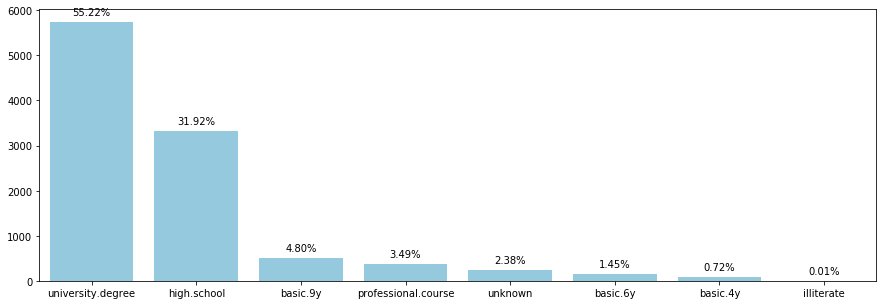

In [13]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='admin.']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format((int(p.get_height())/x_1.iloc[:,0].sum())*100,'.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
    

55.22% people who has job as admin holds 'University Degree'. Therefore, we will fill missing education values as 'University Degree' with jobs as 'admin'. Similarly we will check for other missing education values with respect to their jobs and fill those missing values accordingly. 

In [14]:
df.loc[((df['job'] == 'admin.') & (df['education']=='unknown')),'education'] = 'university.degree'
df[(df['job'] =='admin.')]['education'].value_counts() 

university.degree      5987
high.school            3318
basic.9y                499
professional.course     363
basic.6y                151
basic.4y                 75
illiterate                1
Name: education, dtype: int64

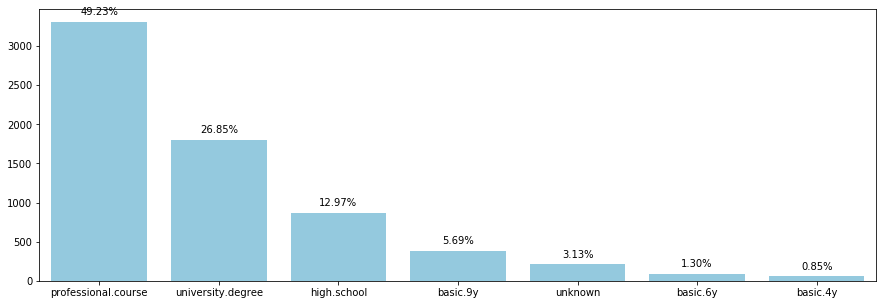

In [15]:
f, ax = plt.subplots(figsize=(15,5))
x_1 = pd.DataFrame(df[df['job']=='technician']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format((int(p.get_height())/x_1.iloc[:,0].sum())*100,'.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
    

In [16]:
df.loc[((df['job'] == 'technician') & (df['education']=='unknown')),'education'] = 'professional.course'
df[(df['job'] =='technician')]['education'].value_counts() 

professional.course    3517
university.degree      1804
high.school             871
basic.9y                382
basic.6y                 87
basic.4y                 57
Name: education, dtype: int64

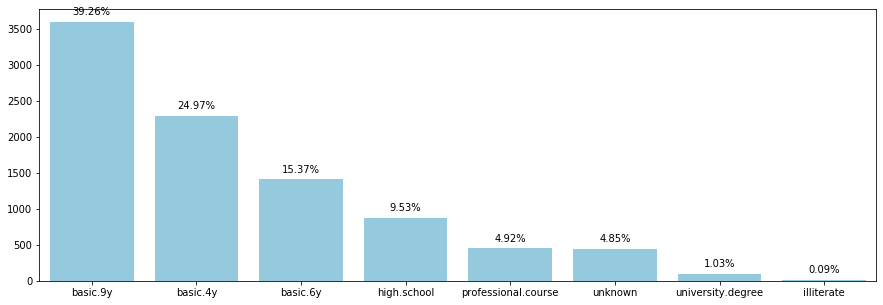

In [17]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='blue-collar']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format((int(p.get_height())/x_1.iloc[:,0].sum())*100,'.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [18]:
df.loc[((df['job'] == 'blue-collar') & (df['education']=='unknown')),'education'] = 'basic.9y'
df[(df['job'] =='blue-collar')]['education'].value_counts() 

basic.9y               4041
basic.4y               2288
basic.6y               1408
high.school             873
professional.course     451
university.degree        94
illiterate                8
Name: education, dtype: int64

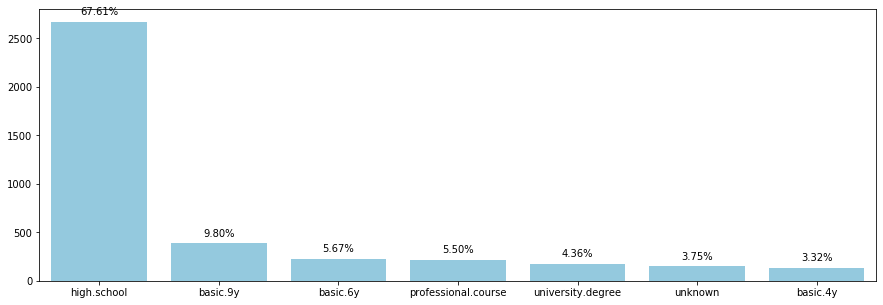

In [19]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='services']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format((int(p.get_height())/x_1.iloc[:,0].sum())*100,'.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
    

In [20]:
df.loc[((df['job'] == 'services') & (df['education']=='unknown')),'education'] = 'high.school'
df[(df['job'] =='services')]['education'].value_counts() 

high.school            2818
basic.9y                387
basic.6y                224
professional.course     217
university.degree       172
basic.4y                131
Name: education, dtype: int64

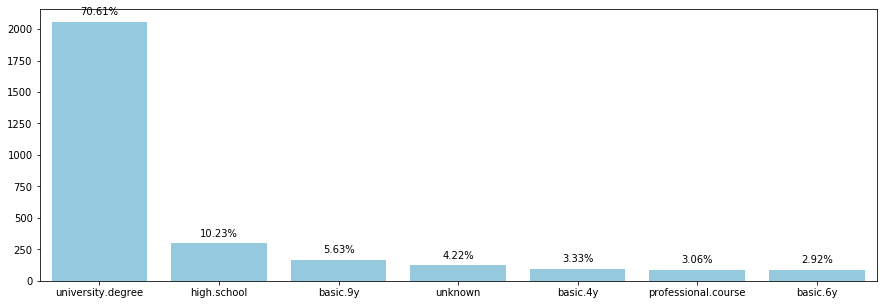

In [21]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='management']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format((int(p.get_height())/x_1.iloc[:,0].sum())*100,'.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [22]:
df.loc[((df['job'] == 'management') & (df['education']=='unknown')),'education'] = 'university.degree'
df[(df['job'] =='management')]['education'].value_counts() 

university.degree      2180
high.school             298
basic.9y                164
basic.4y                 97
professional.course      89
basic.6y                 85
Name: education, dtype: int64

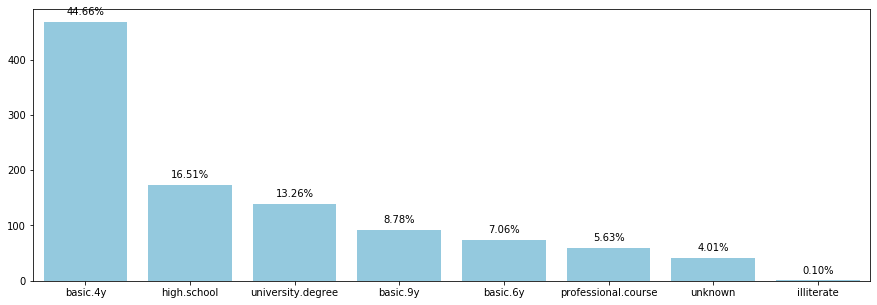

In [23]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='housemaid']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format((int(p.get_height())/x_1.iloc[:,0].sum())*100,'.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [24]:
df.loc[((df['job'] == 'housemaid') & (df['education']=='unknown')),'education'] = 'basic.4y'
df[(df['job'] =='housemaid')]['education'].value_counts() 

basic.4y               510
high.school            173
university.degree      139
basic.9y                92
basic.6y                74
professional.course     59
illiterate               1
Name: education, dtype: int64

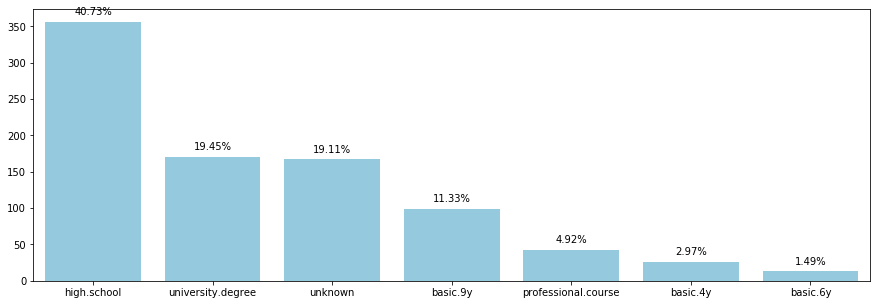

In [25]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='student']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format((int(p.get_height())/x_1.iloc[:,0].sum())*100,'.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [26]:
df.loc[((df['job'] == 'student') & (df['education']=='unknown')),'education'] = 'high.school'
df[(df['job'] =='student')]['education'].value_counts() 

high.school            523
university.degree      170
basic.9y                99
professional.course     43
basic.4y                26
basic.6y                13
Name: education, dtype: int64

In [27]:
df['education'].value_counts()

university.degree      12499
high.school             9796
basic.9y                6451
professional.course     5433
basic.4y                4164
basic.6y                2268
unknown                  332
illiterate                18
Name: education, dtype: int64

Similarly Handling missing values from Job column

In [28]:
#Counts value from Education columns
df['job'].value_counts()

admin.           10394
blue-collar       9163
technician        6718
services          3949
management        2913
retired           1711
entrepreneur      1449
self-employed     1410
housemaid         1048
unemployed        1006
student            874
unknown            326
Name: job, dtype: int64

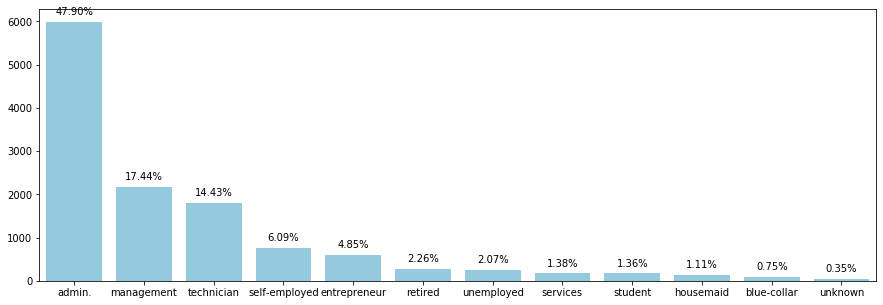

In [29]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['education']=='university.degree']['job'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.job)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format((int(p.get_height())/x_1.iloc[:,0].sum())*100,'.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [30]:
df.loc[((df['education'] == 'university.degree') & (df['job']=='unknown')),'job'] = 'admin.'
df[df['education']=='university.degree']['job'].value_counts()

admin.           6031
management       2180
technician       1804
self-employed     761
entrepreneur      606
retired           283
unemployed        259
services          172
student           170
housemaid         139
blue-collar        94
Name: job, dtype: int64

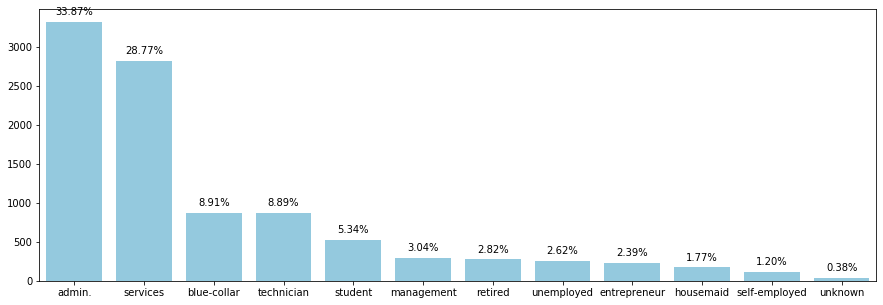

In [31]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['education']=='high.school']['job'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.job)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format((int(p.get_height())/x_1.iloc[:,0].sum())*100,'.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [32]:
df.loc[((df['education'] == 'high.school') & (df['job']=='unknown')),'job'] = 'admin.'
df[df['education']=='high.school']['job'].value_counts()

admin.           3355
services         2818
blue-collar       873
technician        871
student           523
management        298
retired           276
unemployed        257
entrepreneur      234
housemaid         173
self-employed     118
Name: job, dtype: int64

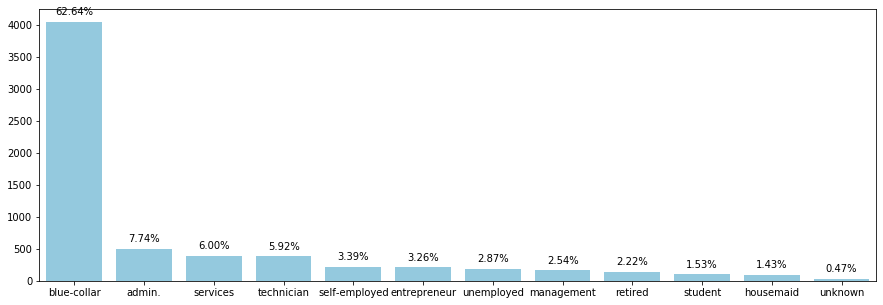

In [33]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['education']=='basic.9y']['job'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.job)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format((int(p.get_height())/x_1.iloc[:,0].sum())*100,'.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [34]:
df.loc[((df['education'] == 'basic.9y') & (df['job']=='unknown')),'job'] = 'blue-collar'
df[df['education']=='basic.9y']['job'].value_counts()

blue-collar      4071
admin.            499
services          387
technician        382
self-employed     219
entrepreneur      210
unemployed        185
management        164
retired           143
student            99
housemaid          92
Name: job, dtype: int64

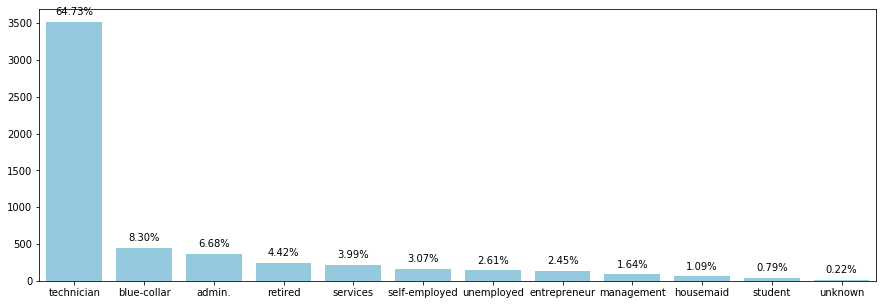

In [35]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['education']=='professional.course']['job'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.job)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format((int(p.get_height())/x_1.iloc[:,0].sum())*100,'.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [36]:
df.loc[((df['education'] == 'professional.course') & (df['job']=='unknown')),'job'] = 'technician'
df[df['education']=='professional.course']['job'].value_counts()

technician       3529
blue-collar       451
admin.            363
retired           240
services          217
self-employed     167
unemployed        142
entrepreneur      133
management         89
housemaid          59
student            43
Name: job, dtype: int64

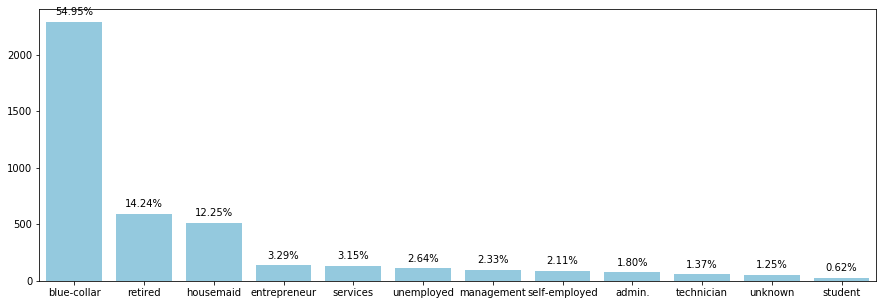

In [37]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['education']=='basic.4y']['job'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.job)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format((int(p.get_height())/x_1.iloc[:,0].sum())*100,'.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [38]:
df.loc[((df['education'] == 'basic.4y') & (df['job']=='unknown')),'job'] = 'blue-collar'
df[df['education']=='basic.4y']['job'].value_counts()

blue-collar      2340
retired           593
housemaid         510
entrepreneur      137
services          131
unemployed        110
management         97
self-employed      88
admin.             75
technician         57
student            26
Name: job, dtype: int64

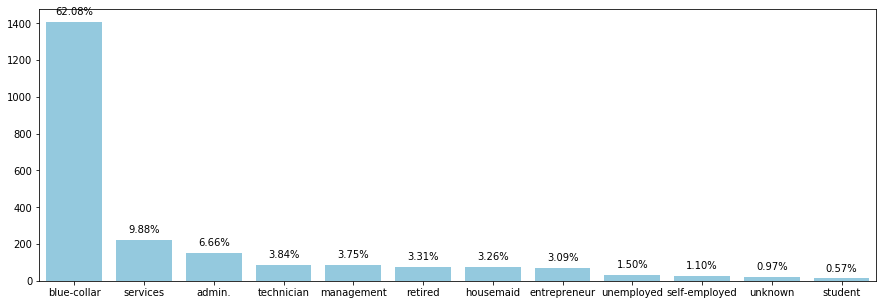

In [39]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['education']=='basic.6y']['job'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.job)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format((int(p.get_height())/x_1.iloc[:,0].sum())*100,'.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [40]:
df.loc[((df['education'] == 'basic.6y') & (df['job']=='unknown')),'job'] = 'blue-collar'
df[df['education']=='basic.6y']['job'].value_counts()

blue-collar      1430
services          224
admin.            151
technician         87
management         85
retired            75
housemaid          74
entrepreneur       70
unemployed         34
self-employed      25
student            13
Name: job, dtype: int64

In [41]:
df['job'].value_counts()

admin.           10475
blue-collar       9267
technician        6730
services          3949
management        2913
retired           1711
entrepreneur      1449
self-employed     1410
housemaid         1048
unemployed        1006
student            874
unknown            129
Name: job, dtype: int64

In [42]:
#Drop the Rows where  which Job or Education Fields are unknown
indexNames = df[(df.job == 'unknown') | (df.education == 'unknown') ].index
df.drop(indexNames , inplace=True)
df.shape

(40629, 21)

<h3>Duration Column highly affects the target variable.Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [43]:
df.drop('duration', axis=1,inplace=True)
df.shape

(40629, 20)

Here 'pdays' feature represenets no. of days passed after the customer was previously contacted. '999' value represents that customer was not contacted previously. Here 'previous' feature represents number of contacts performed before this campaign and for this client. 

If value of 'pdays' for a customer is '999' then value of 'previous' should be 0. If there is any other value other than '0' for 'previous' for suh records then we con consider that there is inconsistency.

Therefore, we will make all the values of 'previous' as '0' whose 'pdays' is '999'

Check different Number of contact performed for clients previously ('previous' feature) for those clients which were not previously contacted (value of pdays='999')  

In [44]:
#df[(df['pdays']==999) & (df['previous'] != 0)][['pdays','previous']]
df[(df['pdays']==999)]['previous'].value_counts()

0    35068
1     3656
2      345
3       50
4       11
5        2
6        1
Name: previous, dtype: int64

In [45]:
#For clients which were not contacted previously(pdays=999) for them number of contacts should be 0
df.loc[((df['pdays'] == 999) & (df['previous']!= 0)),'previous'] = 0
df[(df['pdays']==999)]['previous'].value_counts()

0    39133
Name: previous, dtype: int64

In [46]:
indexNames = df[(df.marital == 'unknown')].index
df.drop(indexNames , inplace=True)
df.shape

(40554, 20)

<B>Cross check if any missing values exists in data</B>

In [47]:
if 'unknown' in df.values : 
    print("\nThis value exists in Dataframe") 
  
else : 
    print("\nThis value does not exists in Dataframe") 


This value does not exists in Dataframe


## Export data to a new csv file as checkpoint of data wrangling process

In [48]:
df.to_csv('data/step2_output.csv',index=False)

3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
        - Drop highly correlated columns
 * Identification and creation of features
 * t-test on age column with respect to subscription

<B> Import Data and get basic details of data

In [49]:
df=pd.read_csv('data/step2_output.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [50]:
indexNames = df[(df.marital == 'unknown')].index
df.drop(indexNames , inplace=True)
df.shape

(40554, 20)

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40554.0,39.896706,10.323219,17.000,32.000,38.000,47.000,98.000
default,40554.0,0.119174,0.323998,0.000,0.000,0.000,0.000,1.000
housing,40554.0,0.527100,0.499271,0.000,0.000,1.000,1.000,1.000
loan,40554.0,0.152611,0.359617,0.000,0.000,0.000,0.000,1.000
campaign,40554.0,2.566183,2.759716,1.000,1.000,2.000,3.000,43.000
pdays,40554.0,962.492233,186.869305,0.000,999.000,999.000,999.000,999.000
previous,40554.0,0.060931,0.359615,0.000,0.000,0.000,0.000,7.000
emp.var.rate,40554.0,0.079440,1.570318,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,40554.0,93.574280,0.578083,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,40554.0,-40.520070,4.625974,-50.800,-42.700,-41.800,-36.400,-26.900


<B>Hist Plot

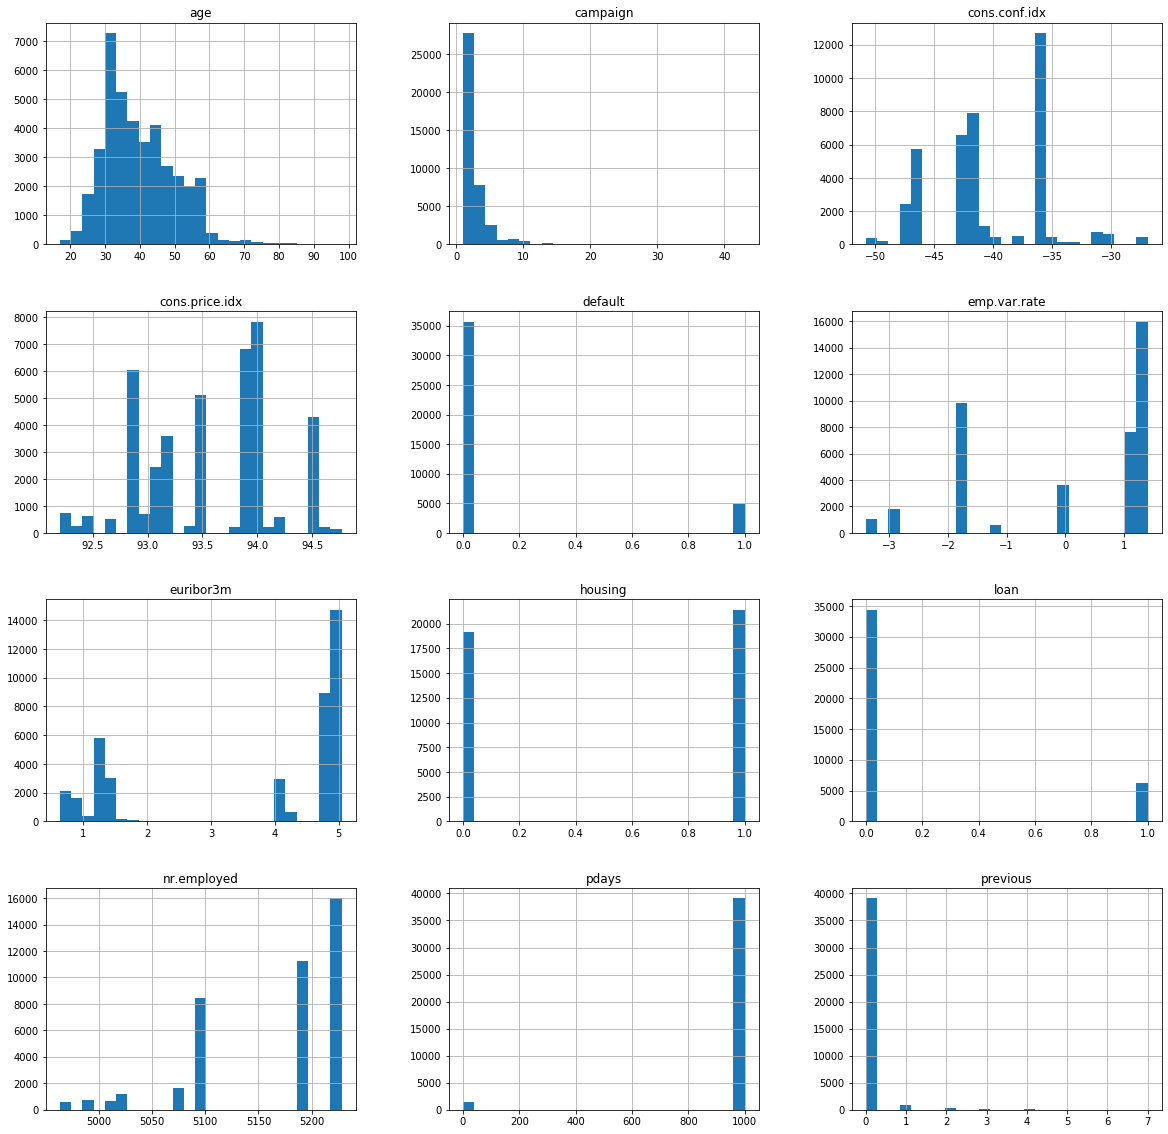

In [52]:
hist = df.hist(bins=25,figsize =(20,20))

From above graph we can conclude below points :
<ul>
    <li>We have huge number of customers between age 30-60</li>
    <li>By looking at pdays feature we can see, most of the customers are never been contacted yet</li>
    <li>Quarterly rate indicater i.e. percent of interest per 3 months is either high (4%-5%) or low (0.5% - 1.5%)</li>
    <li>There are ~ equal number of customers with housing loan</li>
    <li>Counts of Customers with personal loan are quiet low</li>
    <li>Counts of Customer with default credits are also low</li>
    </ul>
    

<B>Get Counts of each categorical columns with respect to subscription</B>

In [53]:
mari=list(df.marital.value_counts().index)
jobli=list(df.job.value_counts().index)
educa=list(df.education.value_counts().index)
months = ["jan", "feb", "mar", "apr", "may", "jun", 
          "jul", "aug", "sep", "oct", "nov", "dec"]
dfyes=df[df['y']=='yes']

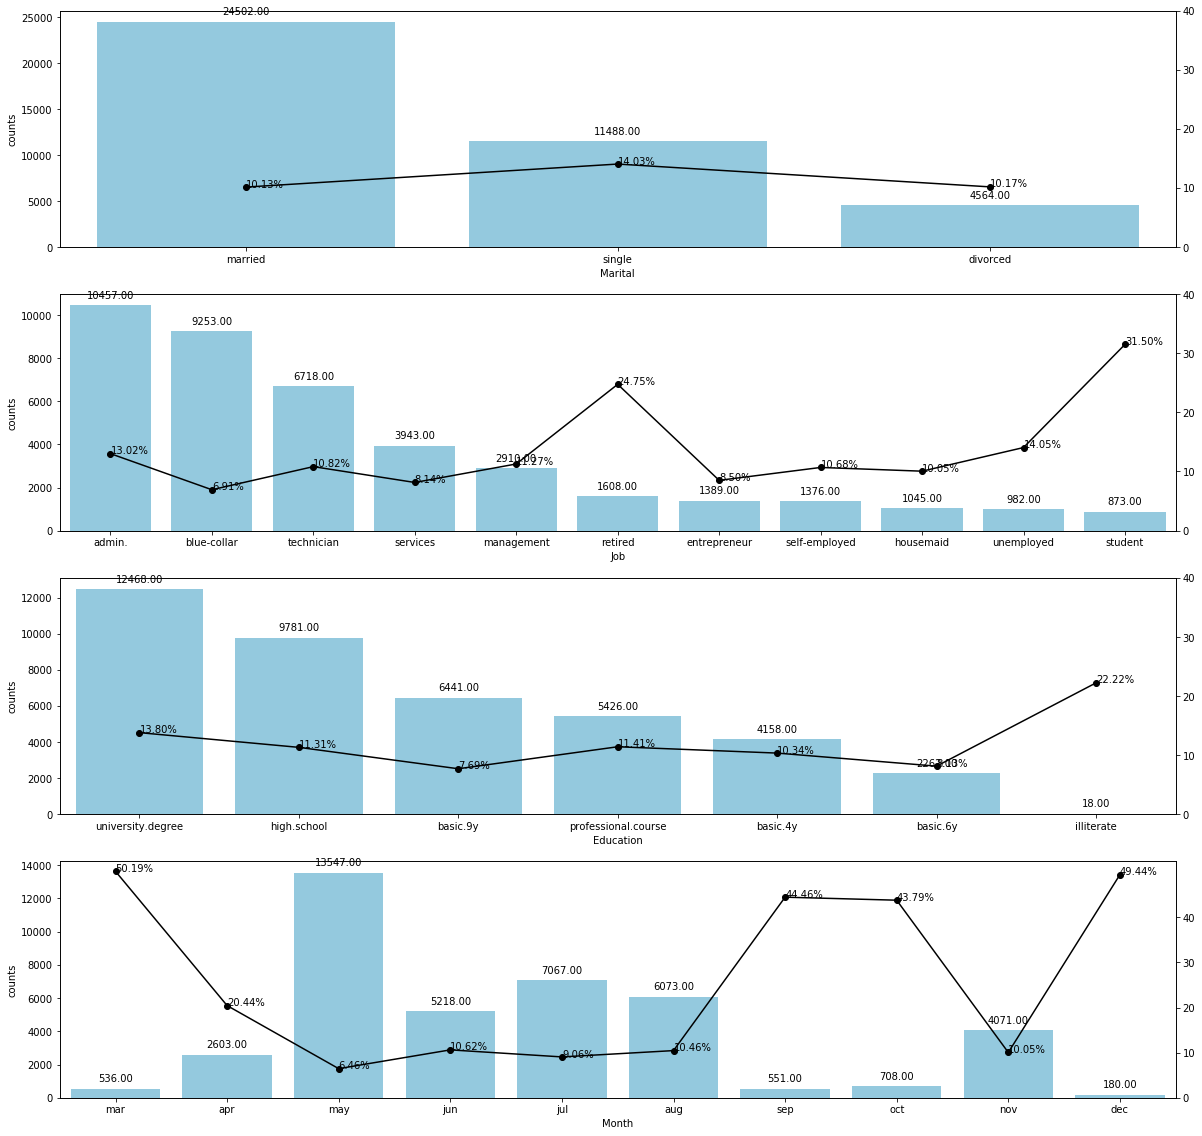

In [54]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(20, 20))
x_1 = pd.DataFrame(df.marital.value_counts()).reindex(mari, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.marital)
x_2 = pd.DataFrame(dfyes.marital.value_counts()).reindex(mari, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.marital)
ax11 =ax1.twinx()
value_per=[]
for i, txt in enumerate(values_2):
    per=format((txt/x_1.marital.iloc[i])*100,'.2f')
    value_per.append(float(per))
    txt_1 = per + '%'
    ax11.annotate(txt_1, (names_2[i], value_per[i]))  
ax11.plot(names_2,value_per,linestyle='-', marker='o',color = 'black')
plt.yticks(np.arange(0, 50, 10))
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax1)
splot.set(xlabel= 'Marital', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

x_1 = pd.DataFrame(df.job.value_counts()).reindex(jobli, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.job)
x_2 = pd.DataFrame(dfyes.job.value_counts()).reindex(jobli, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.job)
ax21 =ax2.twinx()
value_per.clear()
for i, txt in enumerate(values_2):
    per=format((txt/x_1.job.iloc[i])*100,'.2f')
    value_per.append(float(per))
    txt_1 = per+ '%'
    ax21.annotate(txt_1, (names_2[i], value_per[i]))  
ax21.plot(names_2,value_per,linestyle='-', marker='o',color = 'black')
plt.yticks(np.arange(0, 50, 10))
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax2)
splot.set(xlabel= 'Job', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
        
x_1 = pd.DataFrame(df.education.value_counts()).reindex(educa, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.education)
x_2 = pd.DataFrame(dfyes.education.value_counts()).reindex(educa, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.education)
ax31 =ax3.twinx()
value_per.clear()
for i, txt in enumerate(values_2):
    per = format((txt/x_1.education.iloc[i])*100,'.2f')
    value_per.append(float(per))
    txt_1 = per + '%'
    ax31.annotate(txt_1, (names_2[i], value_per[i]))
ax31.plot(names_2,value_per,linestyle='-', marker='o',color = 'black')
plt.yticks(np.arange(0, 50, 10))
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax3)
splot.set(xlabel= 'Education', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
        
x_1 = pd.DataFrame(df.month.value_counts()).reindex(months, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.month)
x_2 = pd.DataFrame(dfyes.month.value_counts()).reindex(months, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.month)
ax41 =ax4.twinx()
value_per.clear()
for i, txt in enumerate(values_2):
    per = format((txt/x_1.month.iloc[i])*100,'.2f')
    value_per.append(float(per))
    txt_1 = per + '%'
    ax41.annotate(txt_1, (names_2[i], value_per[i]))  
ax41.plot(names_2,value_per,linestyle='-', marker='o',color = 'black')
plt.yticks(np.arange(0, 50, 10))
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax4)
splot.set(xlabel= 'Month', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
        
                        

From above graphs in term of marital status, we can conclude that people who are married subscribed the product most.In term of education, People with university degree have subscribed the most. In terms of job, Admins have subscribed the product most. After observing month wise graph, we see that in the month of March, June, September and December product is subscribed most.

<B> Box Plot

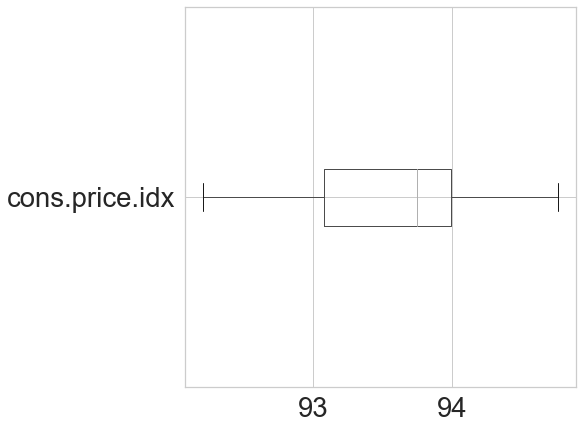

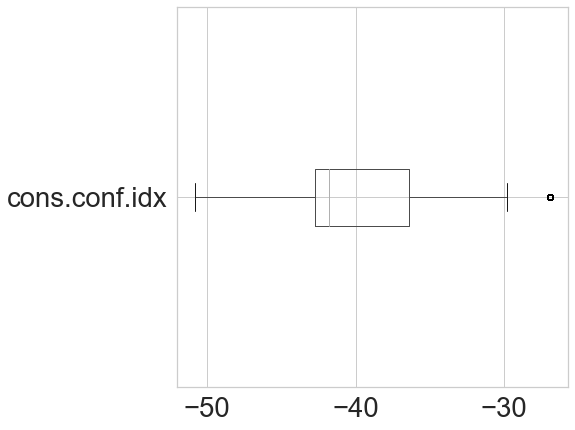

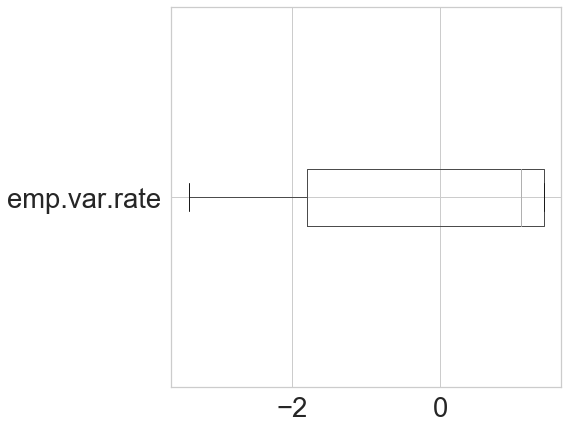

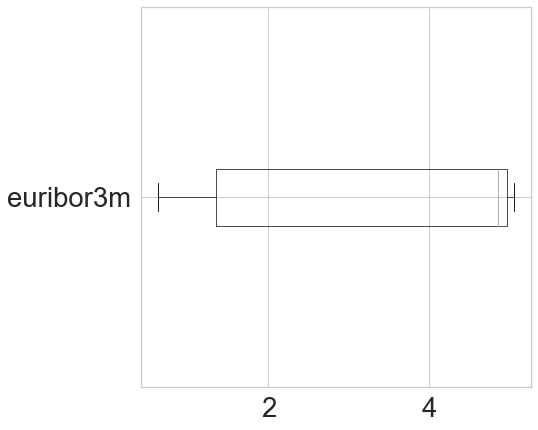

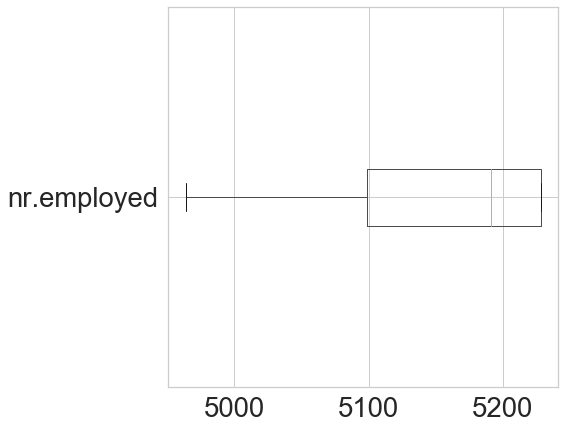

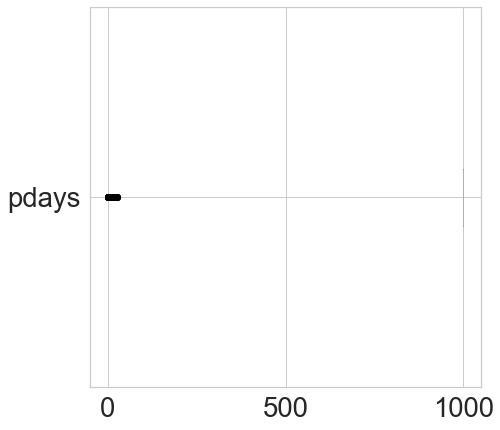

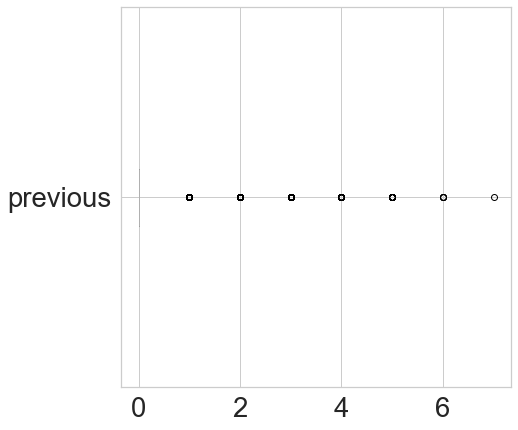

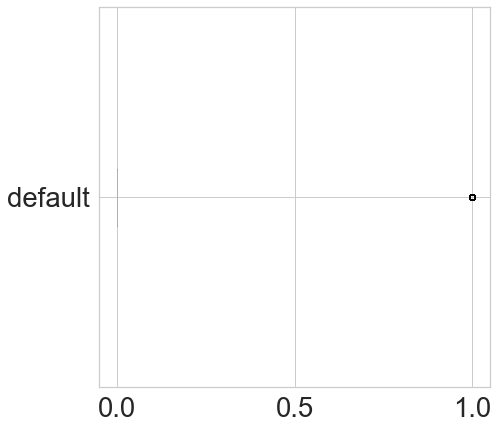

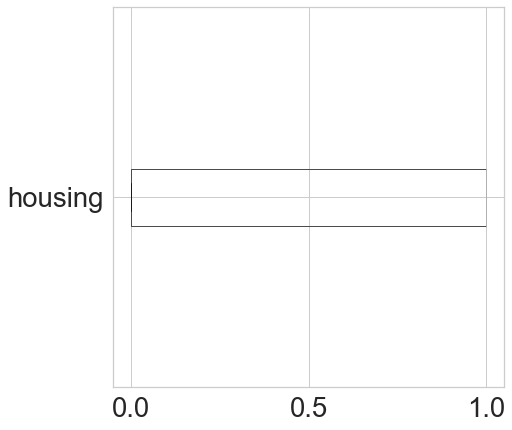

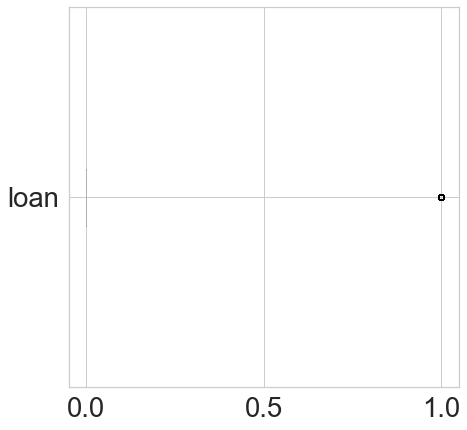

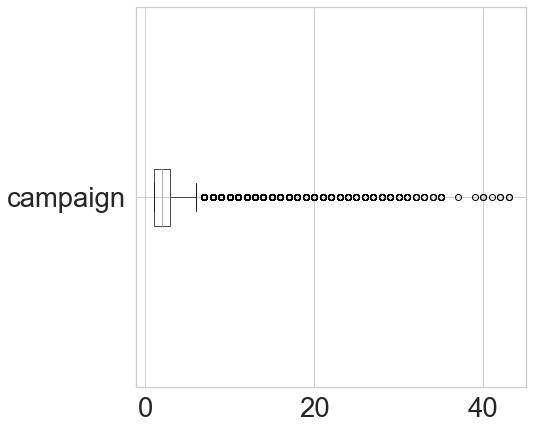

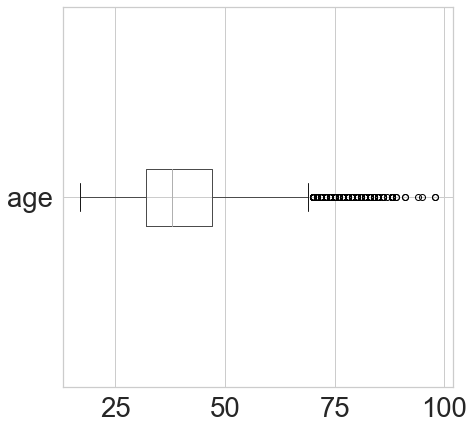

In [55]:
columns=['cons.price.idx', 'cons.conf.idx','emp.var.rate','euribor3m', 'nr.employed','pdays','previous','default', 'housing', 'loan','campaign','age']
sns.set(rc={'figure.figsize':(7,7)}, font_scale=2.5, style='whitegrid')
for column in columns:
    plt.figure()
    df.boxplot([column],vert=False)

We dont see any major ouliers in above features except for campaign and age features. But these values are expected here. For 'age' we might have limited customers contacted with age above 60. And for campaign feature we might have customer whom we have conted more than 5-6 time in this campaigns. For rest of the features we see outliers but these are execpected values for that feature, here we see them as outlier because these values are very less compare to other values.Therefore we will avoid removig data using outlier methods

<B>Pair Plot</B>

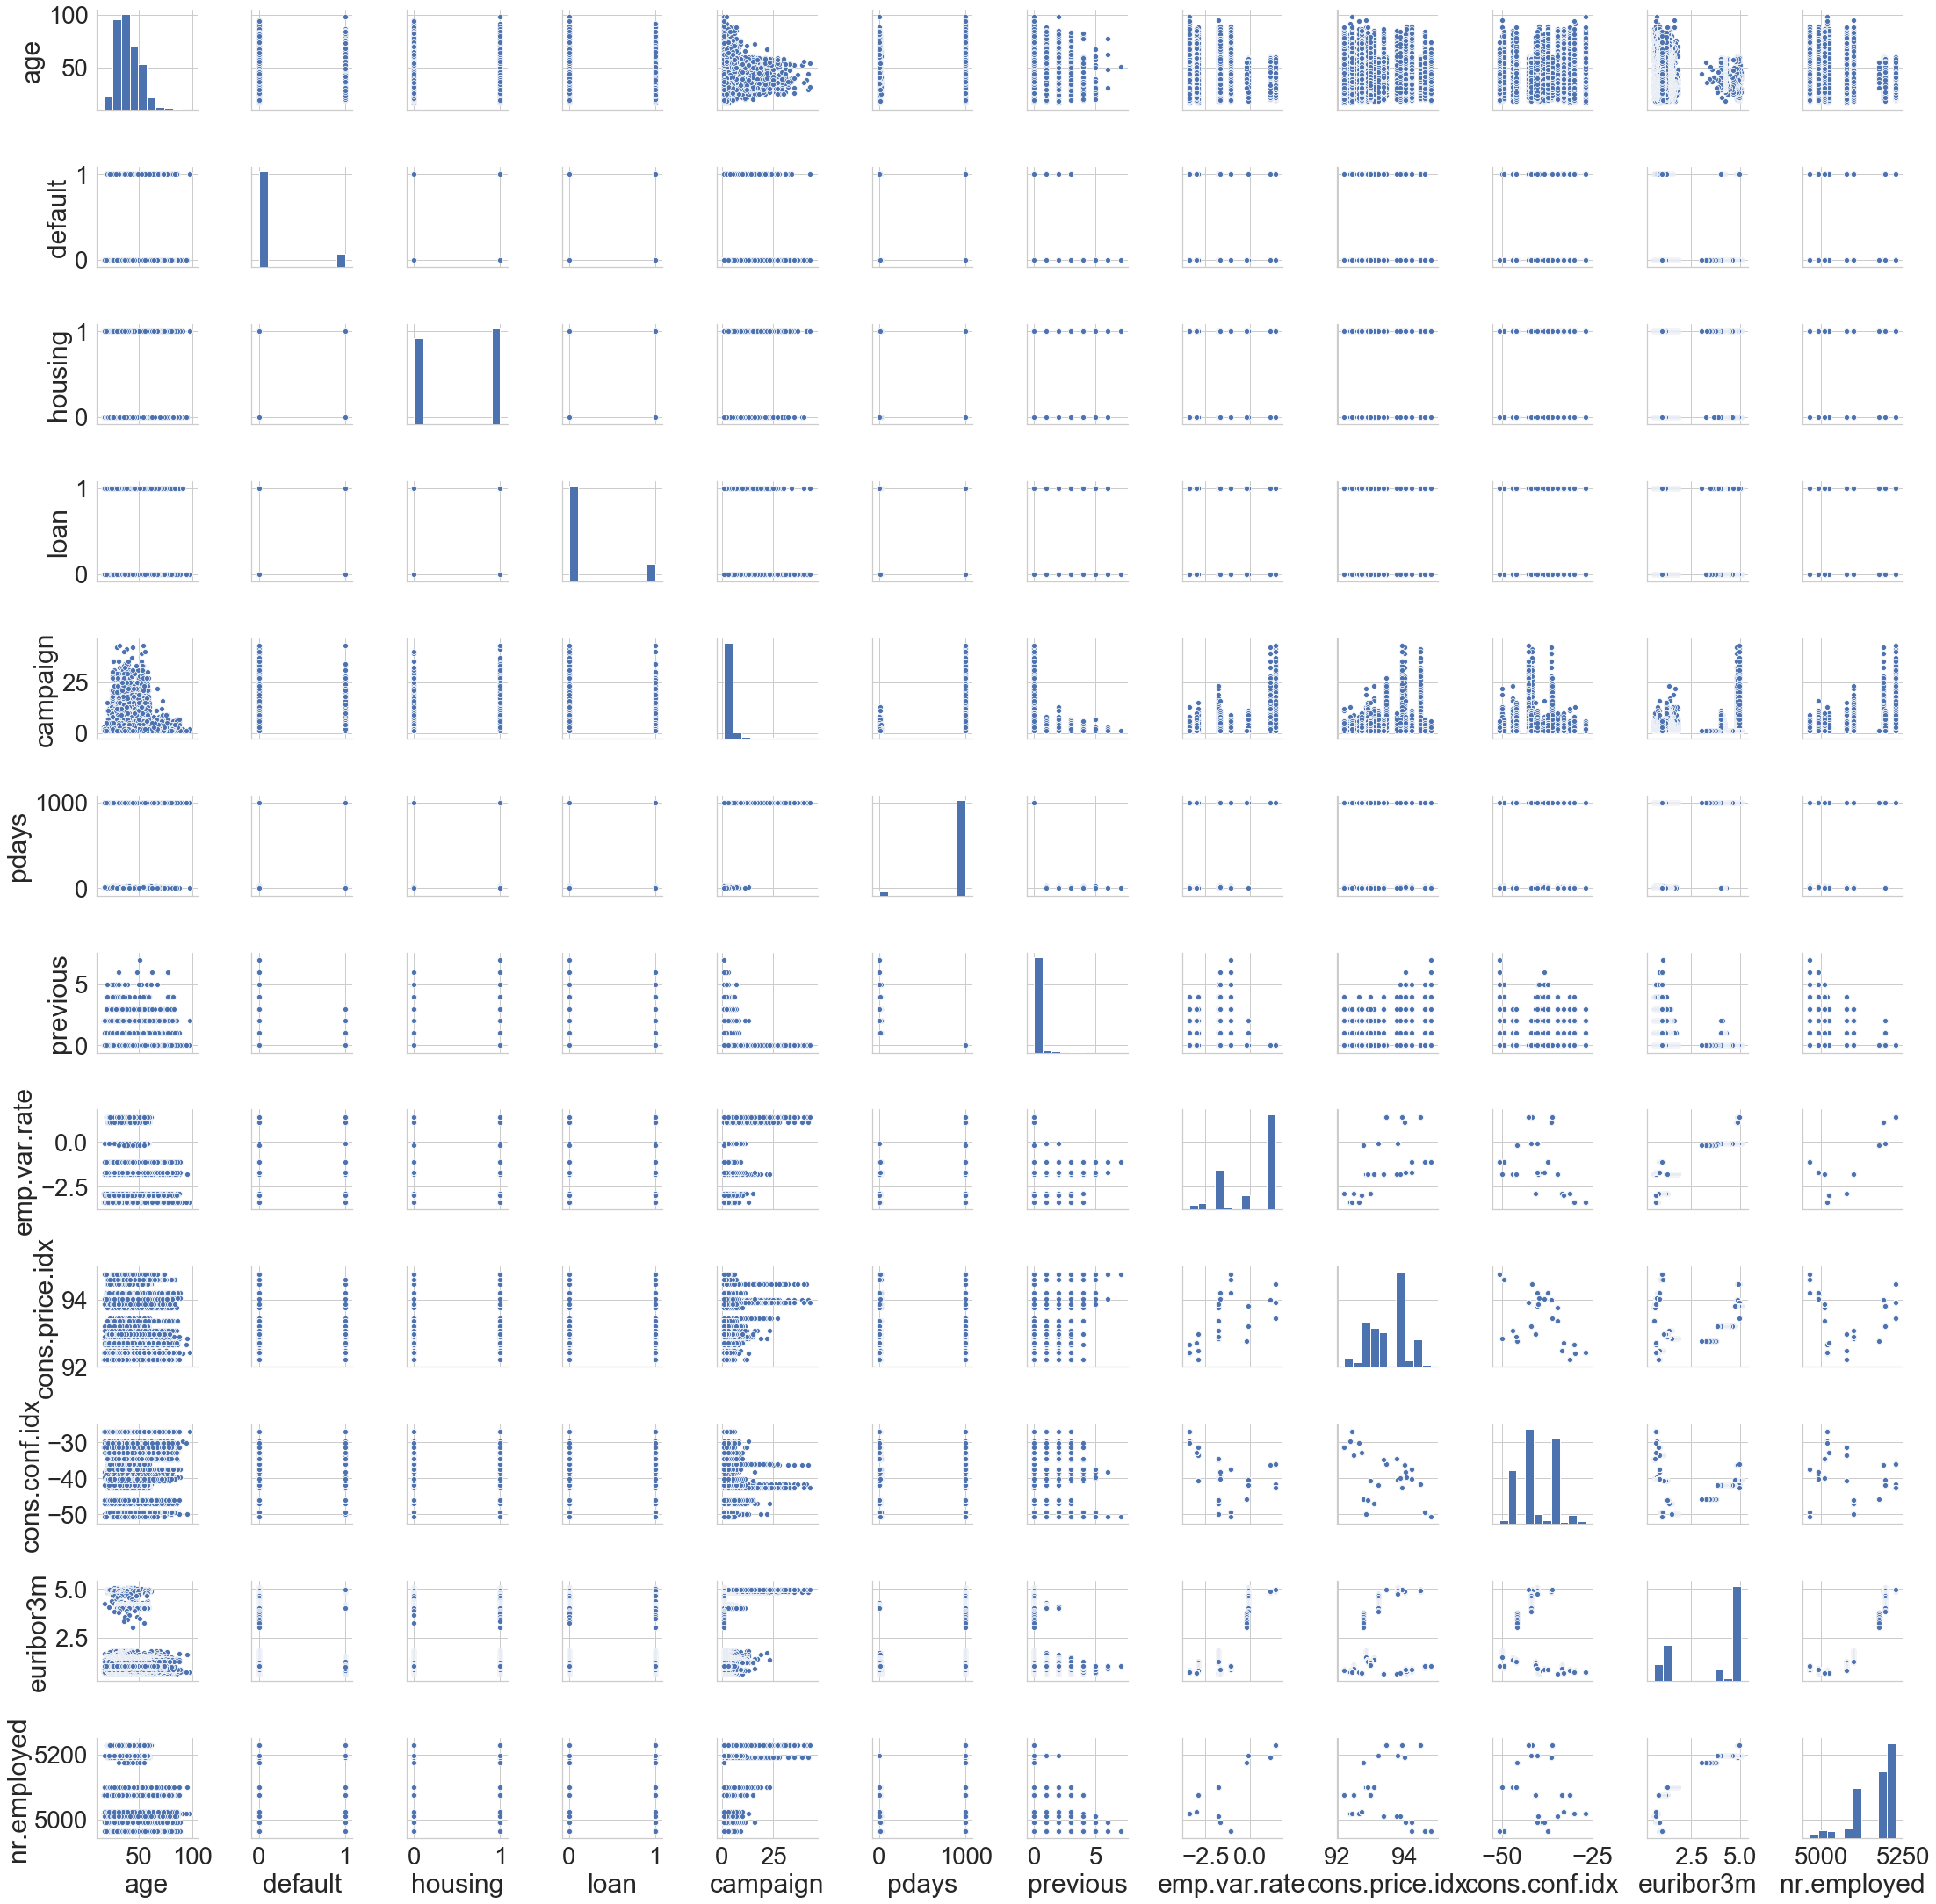

In [56]:
g = sns.pairplot(df)

From above pair plot we can see distribution of data for different features. Observations are as below:
<ul>
    <li>There are numbers features for which data has been distributed in binary classification values</li>
    <li>Values of age feature is quite normally distributed</li>
    <li>Customer with age between 30-60 has been contacted most in this campaign</li>
    <li>Financial features like 'default', 'housing' and 'loan' contains binary values</li>
    <li>Maximum values for default and loan are '0'(No)</li>
    </ul>
For the features like 'euribor3m','cons.price.idx', 'cons.conf.idx' data is random distibuted w.r.t each others value, so I don't see any significance to infer about realtaion between these columns.

<B>Heatmap

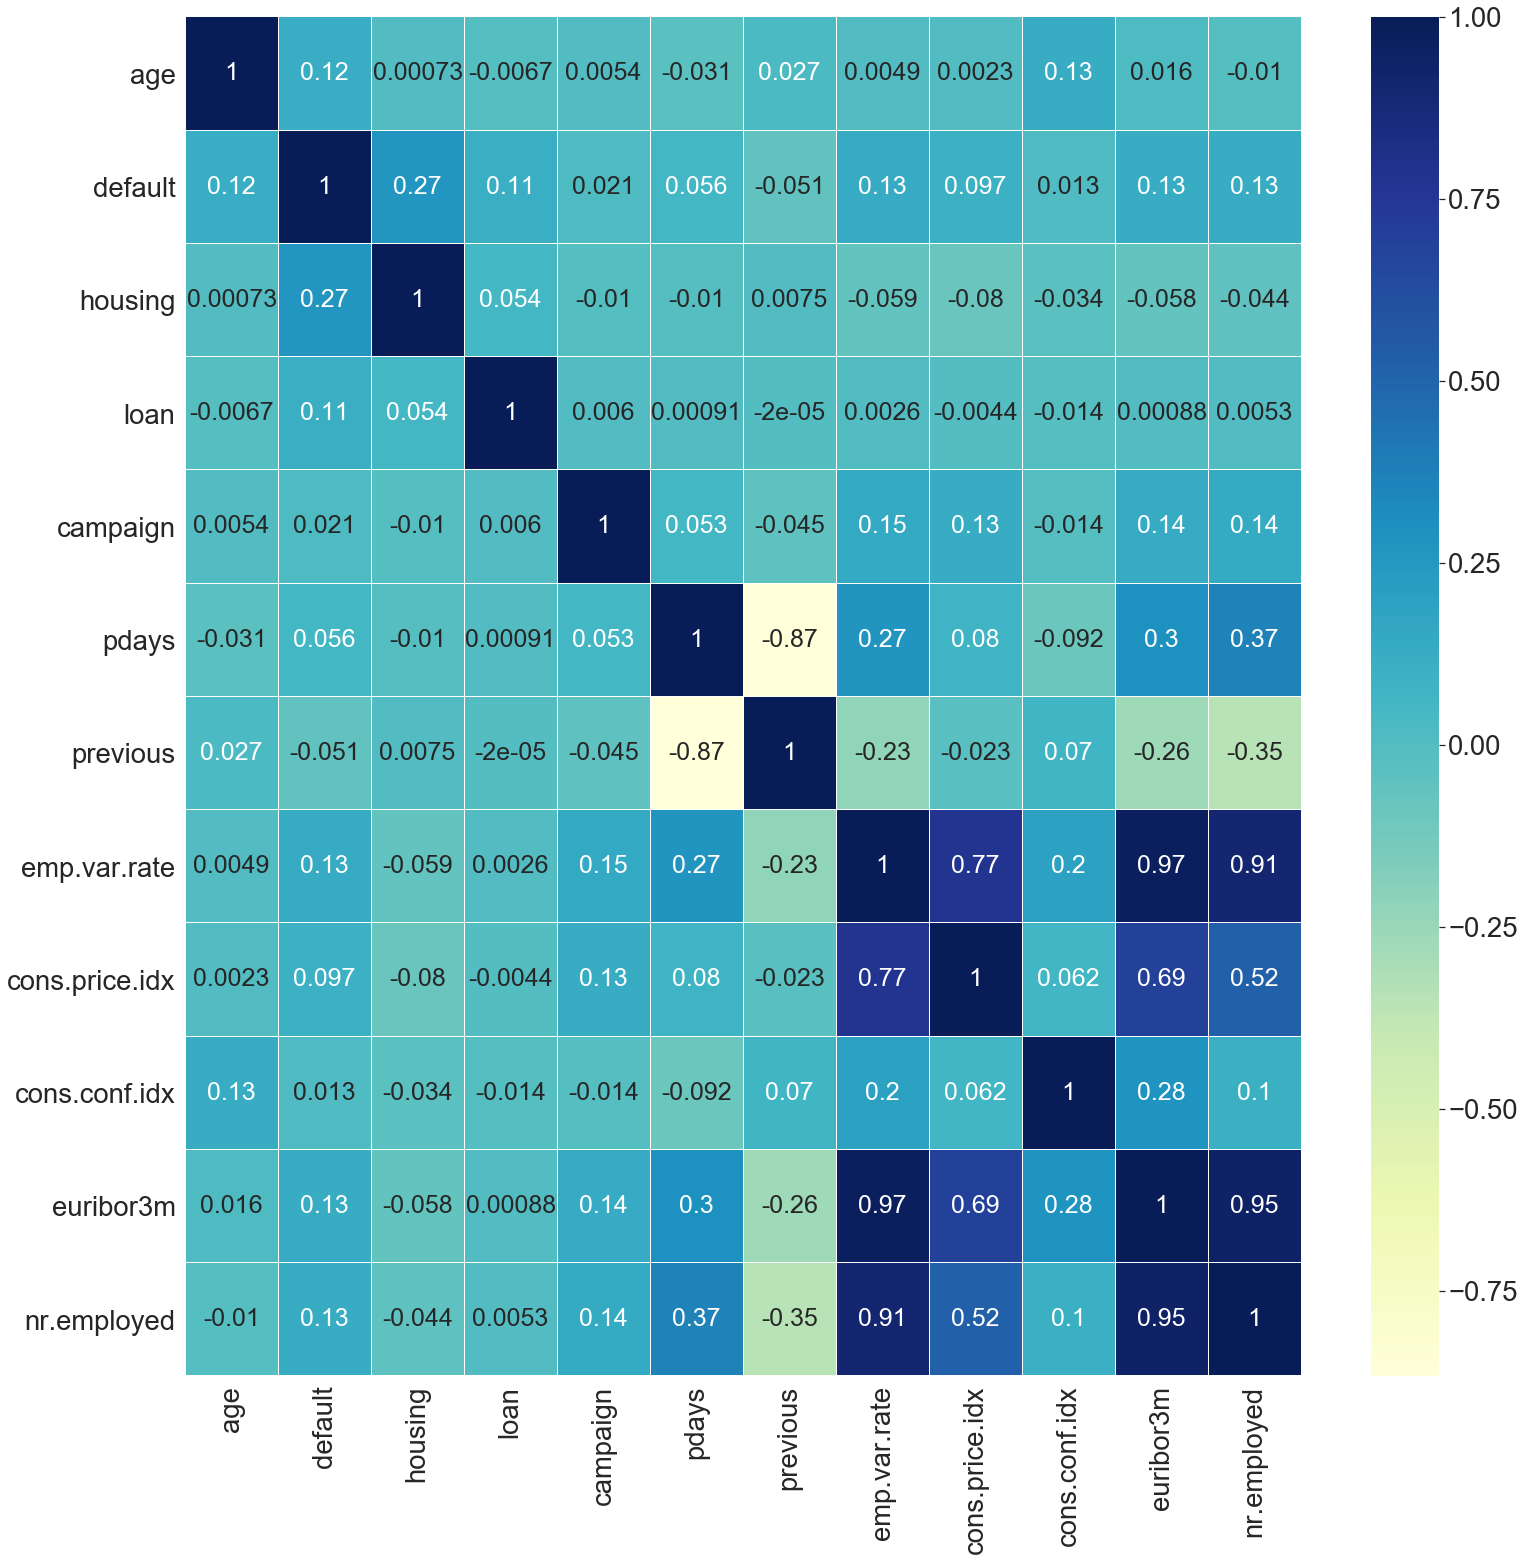

In [57]:
# Make a heatmap of the data 
#create the correlation matrix heat map
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),linewidths=0.1,cmap="YlGnBu", annot=True,annot_kws={"fontsize":25})
plt.yticks(rotation=0);

From Heatamp we can see that columns 'nr.employed','emp.var.rate' and euribor3m are highly correlated. This is expected.Here Employee variation is how many people are being hired due to the shifts in the conditions of the economy. If number of employees hired is high it is expected that number of employees will be higher and gets low if employe variaton rate goes down. 

Additionally,here euribor3m represents rate of interest for 3 months, this is also expected to be high when employee variation rate and no. of employees hired is high. This states that bank is in good financial position and hence, rate of interest provided to customers for a quarter is also high.

<B>Drop highly corelated columns

In [58]:
# Step 1. Call the variable corr_matrix
corr_matrix = df.corr().abs()

# Step 2. Uncomment the following code to get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Step 3. This code iterates through our columns and gets the index of any that have a correlation > 0.95
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.95.
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print(to_drop)
print('Reduced dataframe size: ',df.drop(df[to_drop], axis=1).shape)

['euribor3m', 'nr.employed']
Reduced dataframe size:  (40554, 18)


Here we are dopping above features as these features itself are realted to each other and they are contibuting to similar information in the data i.e. financial poisiton of the bank. Keeping this data will lead to additional dimaensions which will result into more complex models and performance issue in modelling process.

In [59]:
df = df.drop(to_drop, axis = 1)

<B> Perform T-test to identify if people with subscription and without subscription are statiscially different in age groups (from same sample)

<span style="color:red">
Comment: dont write 'aged equally'. perhaps say somehting like the two groups are statiscially different in age groups?</span><br>Done

In [60]:
with_subscription=df.loc[df['y']=='yes']['age']
without_subscription=df.loc[df['y']=='no']['age']

In [61]:
print('Number of records having insurance',with_subscription.shape)
print('Number of records not having insurance',without_subscription.shape)

Number of records having insurance (4558,)
Number of records not having insurance (35996,)


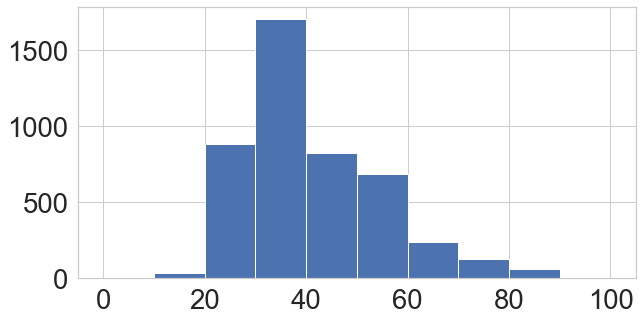

In [62]:
plt.figure(figsize=(10,5))
splot = plt.hist(with_subscription, bins = [0,10,20,30,40,50, 60, 70,80,90, 100])

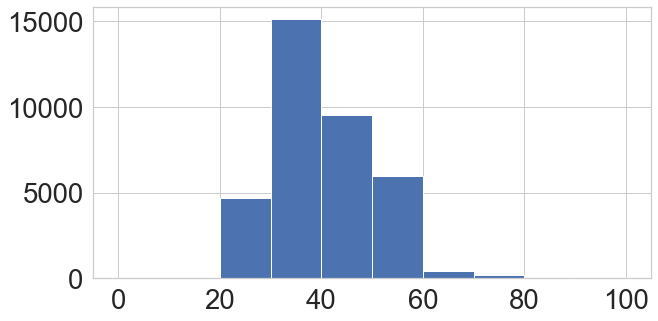

In [63]:
plt.figure(figsize=(10,5))
_ = plt.hist(without_subscription, bins = [0,10,20,30,40,50, 60, 70,80,90, 100])

<B>H0: People with subscription and without subscription are aged equally</B><br>
<B>H1: People with subscription and without subscription are not aged equally

In [64]:
t_stat, p_val = stats.ttest_ind(with_subscription, without_subscription,equal_var=True)

In [65]:
print('T-test statistic is',t_stat)

T-test statistic is 4.8867411756102825


In [66]:
p_val=p_val/2
print('P value is',"%.10f" % p_val)

P value is 0.0000005145


## Export data to a new csv file as checkpoint of EDA process

In [67]:
df.to_csv('data/step3_output.csv',index=False)

4.   **Pre-processing and Training Data Development**  
 * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
      -Fit the model on unscaled data
      -Fit the model on scaled data
          -Balance the data with different approaches
          -Reduce Features with different feature reduction techniques
  * Review Model Outcomes — Iterate over additional models as needed.
          -Hyperparameter Tunning on best models from modelling process
  * Identify the Final Model
          -Use Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

In [68]:
#Read CSV data
df=pd.read_csv('data/step3_output.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,0,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,0,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,no


In [69]:
#Get Shape
print(df.shape)

(40554, 18)


In [70]:
#Get data types for all the colums 
print(df.dtypes)
udf=df

age                 int64
job                object
marital            object
education          object
default             int64
housing             int64
loan                int64
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
y                  object
dtype: object


<B>Get all the columns with object datatype excluding dependent column and perform one hot encoding

In [71]:
only_obj=df.select_dtypes(include=['object'])
only_obj.drop(['y'],axis=1,inplace=True)
col=only_obj.columns

C:\Users\Pranay\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
#Do One Hot encoding for the objects columns
df=pd.get_dummies(df,columns=col)

In [73]:
#Get updated data types of all the columns
df.dtypes

age                                int64
default                            int64
housing                            int64
loan                               int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
y                                 object
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
marital_divorced                   uint8
marital_married                    uint8
marital_single  

In [74]:
#Transform Dependent Variable values
df.y.replace({'yes':1,'no':0},inplace=True)

<B>Deal with other continuous variables

In [75]:
#Group Emp_Var_Rate columns
df['Binned_Emp_Var_Rate']=pd.cut(
    df['emp.var.rate'],
    bins=[-np.inf,-3.5,-2.5,-1.5,-0.5,0.5,1.5,np.inf],
    labels=[-4,-3,-2,-1,0,1,2]
)

In [76]:
#df['euribor3m']=df['euribor3m'].round(1)
df['cons.price.idx']=df['cons.price.idx'].round(2)

<B>Identify appropriate Performance mertric

<ol>
    <li>Problem Type:</li>
    <ul>
        <li>Currernt problem is typical binary classification problem</li>
    </ul>
    <li> End Goal of the project:</li>
    <ul>
        <li>We need to classify whether customer is going to subscribe the product or not (1:yes / 0:No). End Goal is to get the customers who are more likely to subscribe the product and target only those customers.</li>
    </ul>
    <li>Suitable Performance Metric:</li>
    <ul>
        <li>Here, as our goal is to get such customer who are more likely to subscribe the product.We need to focus on imroving true positive rate. Having high false negative error could lead to contact wrong customers. Additionally, in such problems it is okay to have low false positive error, in case we want to minimize false negative error.
            
Therefore, as a performance metric we will be considering model with good recall score. This can result into filter those  customers are most likely to subscribe the product and only those customers will be targeted which as a result will lead to minimised campaign costs

<B> As our data is ready and can we used for modelling purpose, divide the data in traing data and testing data

<H3>Scale the Data and then split again</H3>

In [77]:
X = df.drop(['y','emp.var.rate'], axis=1)
y = df.y
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
#Take backup of X_train and y_train
X_train_bkp = X_train
y_train_bkp = y_train
X_test_bkp  = X_test
y_test_bkp  = y_test

<B>Here going forward, X_train and X_test will be our scaled data. For Scaled data, we will be using below algorithms</B>
<ul><li>Random Forest (Refer Appendix)
    <li>KNN (Refer Appendix)
    <li>Logistic Regression (Refer Appendix)
    <li>SVM   

<B>SVM(Scaled Data)

In [78]:
clf_svm = svm()
clf_svm.fit(X_train, y_train)
y_pred=clf_svm.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

Accuracy Score of SVM is 0.8969326363546701


In [79]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8970   46]
 [ 999  124]]


In [80]:
print('Classifiaction Report with scaling the data and using SVM \n',classification_report(y_test, y_pred))

Classifiaction Report with scaling the data and using SVM 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      9016
           1       0.73      0.11      0.19      1123

    accuracy                           0.90     10139
   macro avg       0.81      0.55      0.57     10139
weighted avg       0.88      0.90      0.86     10139



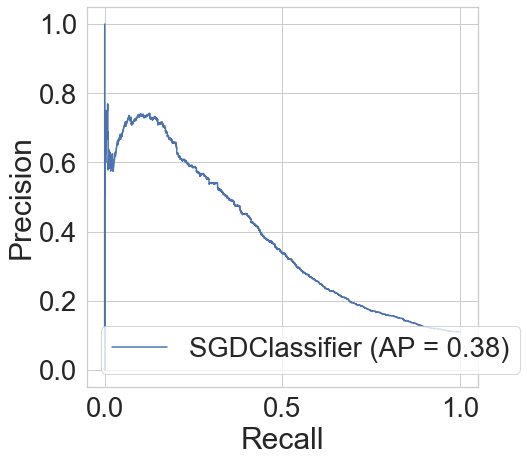

In [81]:
disp=plot_precision_recall_curve(clf_svm, X_test, y_test)


Here precision-recall curve is telling what will be the precison and recall score w.r.t to threshold. For this problem above curve is directly realted to decision matrix therefore checking this curve is appropriate here. Reffereing above curve we can adjust threshold accordingly. Here intension to check Accuracy Score is get idea of exact what percent of data is classified correctly.

Looking at above curve, I think we still to improve Recall Score and F1 Score for the models.We could balance the data and check the results.

<H3><B>Undersampling (We tried all models as below, but will show only those models which performed best)
    <ul><li>Random Forest
    <li>Logistic Regression 
    <li>SVM  
    <li>Ridge Rigression 
    <li>XG Boost

In [82]:
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

<B>Random Forest Classifier (Undersampling)

In [83]:
rand_clf2= RandomForestClassifier()
rand_clf2.fit(X_train, y_train)
# Print the accuracy from the testing data.
y_pred=rand_clf2.predict(X_test)
print('Accuracy Score of Random Forest is',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score of Random Forest is 0.767629943781438
[[7018 1998]
 [ 358  765]]
Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.78      0.86      9016
           1       0.28      0.68      0.39      1123

    accuracy                           0.77     10139
   macro avg       0.61      0.73      0.62     10139
weighted avg       0.88      0.77      0.81     10139



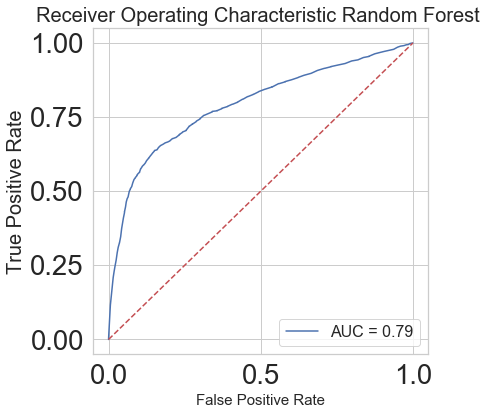

In [84]:
fig, ax = plt.subplots(figsize = (6,6))
probs = rand_clf2.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

Here ROC curve telling what will TPR and FPR w.r.t threshold for this model. Here I am creating ROC to get sence what will could be my possible threshold as I am more interested in improving TPR(Recall). I think ROC curve is not directly related to my decision matrix but still checking it is appropriate here as I want to understand how FPR will be affected if I try to increase TPR. And I see here if I use threshold less than 0.6 FPR will also increase.  

In [85]:
#update the threshold and then predict the value
THRESHOLD = 0.60
#y_pred=clf.predict(X_test)
y_pred=np.where(rand_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score by after balancing the data and using Random Forest 0.8288785876319164
[[7696 1320]
 [ 415  708]]
Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      9016
           1       0.35      0.63      0.45      1123

    accuracy                           0.83     10139
   macro avg       0.65      0.74      0.67     10139
weighted avg       0.88      0.83      0.85     10139



<H2>Still we need to work on improving F1 score</H2>
<B> We will need to look for feature reduction techniques<B>
    <UL><LI>PCA>>KNN
    <LI>Club Features into similar Categories

<B>Reduce Feature by clubing values into similar categories 

In [86]:
#Clubbing Categories for Education Column
udf['Education_lt_09'],udf['Education_09'],udf['Education_High_School'],udf['Education_University_Degree'],udf['Education_Professional_Course']=0,0,0,0,0
udf.loc[(udf['education'] == 'illiterate') | (udf['education'] == 'basic.4y') |  (udf['education'] == 'basic.6y'),
       'Education_lt_09']=1
udf.loc[(udf['education'] == 'basic.9y'),'Education_09']=1
udf.loc[(udf['education'] == 'high.school'),'Education_High_School']=1
udf.loc[(udf['education'] == 'university.degree'),'Education_University_Degree']=1
udf.loc[(udf['education'] == 'professional.course'),'Education_Professional_Course']=1
udf.drop(['education'], axis=1, inplace=True)

In [87]:
#Clubbing Caegories for Month Column
udf['Quarter1'],udf['Quarter2'],udf['Quarter3'],udf['Quarter4']=0,0,0,0
udf.loc[(udf['month'] == 'jan') | (udf['month'] == 'feb') |  (udf['month'] == 'mar'),'Quarter1']=1
udf.loc[(udf['month'] == 'apr') | (udf['month'] == 'may') |  (udf['month'] == 'jun'),'Quarter2']=1
udf.loc[(udf['month'] == 'jul') | (udf['month'] == 'aug') |  (udf['month'] == 'sep'),'Quarter3']=1
udf.loc[(udf['month'] == 'oct') | (udf['month'] == 'nov') |  (udf['month'] == 'dec'),'Quarter4']=1
udf.drop(['month'], axis=1, inplace=True)

In [88]:
#Clubbing Categorie for Job Columns
udf['Job_No_Income'],udf['Job_Self_Employed'],udf['Job_Management'],udf['Job_Services'],udf['Job_Admin'],udf['Job_blue_collar'],udf['Job_Technician']=0,0,0,0,0,0,0
udf.loc[(udf['job'] == 'housemaid') | (udf['job'] == 'unemployed') | (udf['job'] == 'retired') | (udf['job'] == 'student')
        ,'Job_No_Income']=1
udf.loc[(udf['job'] == 'self-employed') | (udf['job'] == 'entrepreneur'),'Job_Self_Employed']=1
udf.loc[(udf['job'] == 'management'),'Job_Management']=1
udf.loc[(udf['job'] == 'services'),'Job_Services']=1
udf.loc[(udf['job'] == 'admin.'),'Job_Admin']=1
udf.loc[(udf['job'] == 'blue-collar'),'Job_blue_collar']=1
udf.loc[(udf['job'] == 'technician'),'Job_Technician']=1
udf.drop(['job'], axis=1, inplace=True)


<B>Handle rest of the data as earlier

In [89]:
only_obj=udf.select_dtypes(include=['object'])
only_obj.drop(['y'],axis=1,inplace=True)
col=only_obj.columns
#Do One Hot encoding for the objects columns
udf=pd.get_dummies(udf,columns=col)
#Transform Dependent Variable values
udf.y.replace({'yes':1,'no':0},inplace=True)
#Get updated data types of all the columns
udf.dtypes

C:\Users\Pranay\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


age                                int64
default                            int64
housing                            int64
loan                               int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
y                                  int64
Education_lt_09                    int64
Education_09                       int64
Education_High_School              int64
Education_University_Degree        int64
Education_Professional_Course      int64
Quarter1                           int64
Quarter2                           int64
Quarter3                           int64
Quarter4                           int64
Job_No_Income                      int64
Job_Self_Employed                  int64
Job_Management                     int64
Job_Services                       int64
Job_Admin       

In [90]:
#Group Age Columns
udf['Binned_Age']=pd.cut(
    udf['age'],
    bins=[-np.inf,20,30,40,50,60,np.inf],
    labels=['0-20','20-30','30-40','40-50','50-60','60-100']
)
udf.drop(['age'], axis=1, inplace=True)

In [91]:
#Group Emp_Var_Rate columns
udf['Binned_Emp_Var_Rate']=pd.cut(
    udf['emp.var.rate'],
    bins=[-np.inf,-3.5,-2.5,-1.5,-0.5,0.5,1.5,np.inf],
    labels=[-4,-3,-2,-1,0,1,2]
)
udf.drop(['emp.var.rate'], axis=1, inplace=True)

In [92]:
#df['euribor3m']=df['euribor3m'].round(1)
udf['cons.price.idx']=udf['cons.price.idx'].round(2)

In [93]:
iage=list(udf.Binned_Age.value_counts().index)
udfyes=udf[udf['y']==1]

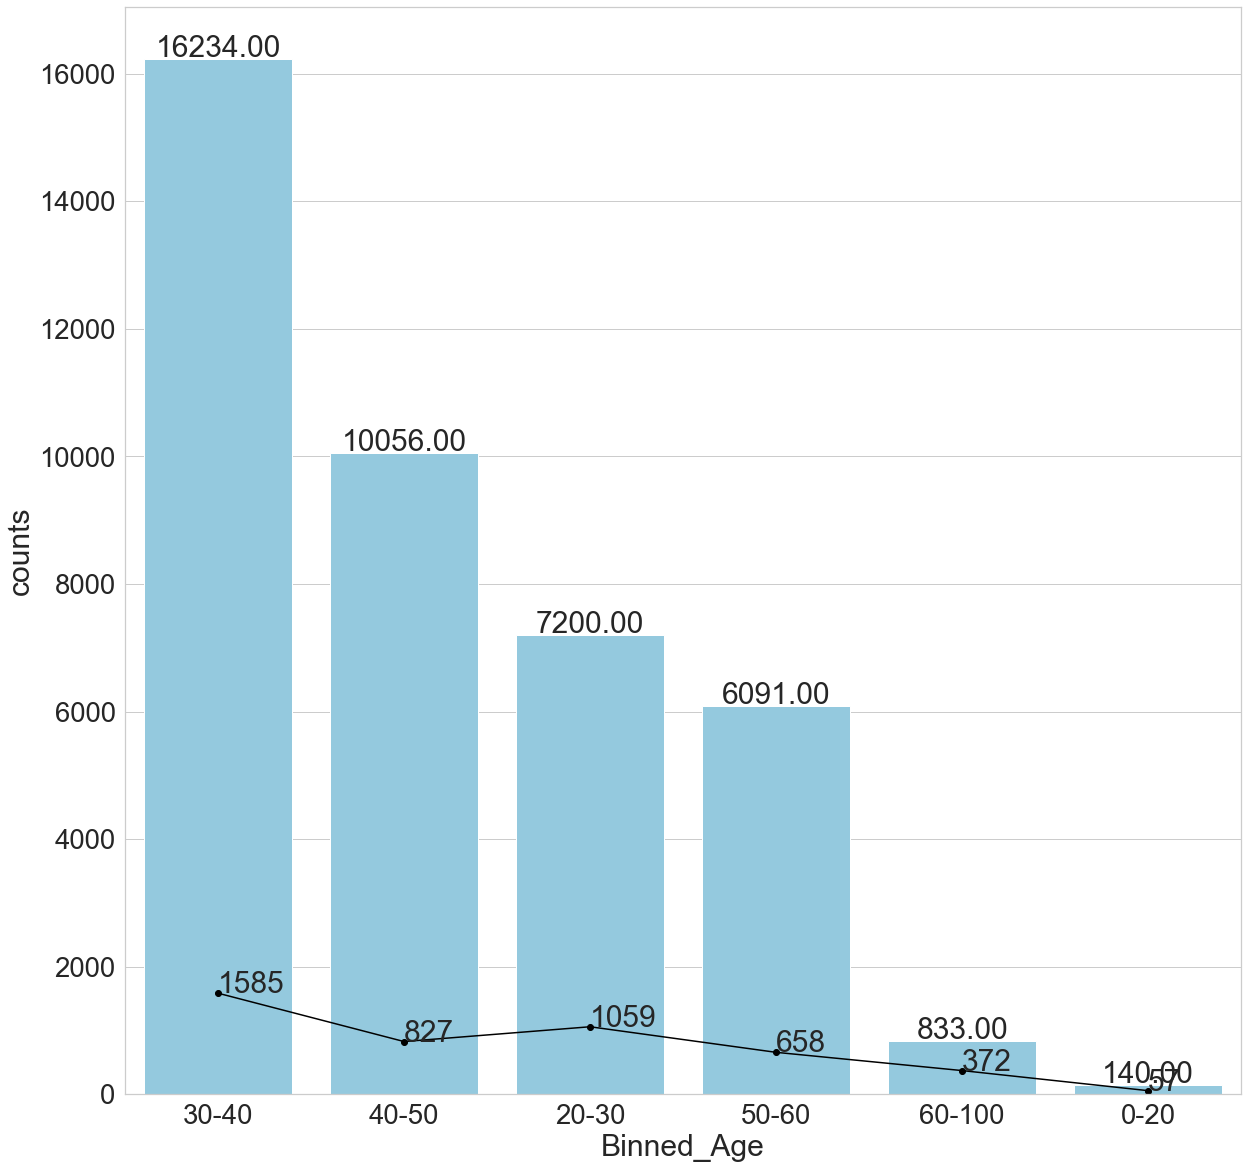

In [94]:
f, (ax1) = plt.subplots(1,1,figsize=(20, 20))
x_1 = pd.DataFrame(udf.Binned_Age.value_counts()).reindex(iage, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.Binned_Age)
x_2 = pd.DataFrame(udfyes.Binned_Age.value_counts()).reindex(iage, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.Binned_Age)
ax1.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax1.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax1)
splot.set(xlabel= 'Binned_Age', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')


In [95]:
udf=pd.get_dummies(udf,columns=['Binned_Age'])
#Get updated Shape
print(udf.shape)

(40554, 45)


In [96]:
#Scale the data and split
X = udf.drop(['y'], axis=1)
y=udf.y
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

<H3><B>Feature Reduction: Clubbing Features (We tried all models as below, but will show only those models which performed best)
    <ul><li>Random Forest
    <li>Logistic Regression 
    <li>SVM  
    <li>Ridge Rigression 
    <li>XG Boost

<B>SVM

In [97]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_ovr, y_ovr = sm.fit_resample(X_train,y_train)

In [98]:
clf_svm1 = svm()
clf_svm1.fit(X_ovr, y_ovr)
y_pred=clf_svm1.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

Accuracy Score of SVM is 0.7575697800572049


In [99]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

Confusion Matrix after updating class weight and using Logistic Regression
 [[6872 2144]
 [ 314  809]]


In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85      9016
           1       0.27      0.72      0.40      1123

    accuracy                           0.76     10139
   macro avg       0.62      0.74      0.62     10139
weighted avg       0.88      0.76      0.80     10139



<h3>Hyper Parameter Tuning : We will apply the best models among all the techinques we used

<B>SVM</B> <br>
SVM worked well on clubbed features data set and balancing data with oversampling. 

In [101]:
param_grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'loss': ['log','hinge'], # logistic regression,
    'penalty': ['l2']
}

In [102]:
svm_cv=svm()
svm_clf_cv =GridSearchCV(svm_cv,param_grid,cv=5)
svm_clf_cv.fit(X_ovr,y_ovr)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                   1000.0],
                         'loss': ['log', 'hinge'], 'penalty': ['l2']})

In [103]:
print("Tuned Ridge Classifier Parameters: {}".format(svm_clf_cv.best_params_))
print("Best score is {}".format(svm_clf_cv.best_score_))

Tuned Ridge Classifier Parameters: {'alpha': 0.01, 'loss': 'log', 'penalty': 'l2'}
Best score is 0.7411786508524834


In [104]:
svm_best_clf_cv = svm(alpha=0.01,loss= 'log', penalty= 'l2')
svm_best_clf_cv.fit(X_ovr, y_ovr)
y_pred=svm_best_clf_cv.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

Accuracy Score of SVM is 0.8151691488312457


In [105]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Final Logistic Regression\n',cm)

Confusion Matrix for Final Logistic Regression
 [[7512 1504]
 [ 370  753]]


In [106]:
print('Classifiaction Report after updating class weight and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report after updating class weight and using Logistic Regression
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      9016
           1       0.33      0.67      0.45      1123

    accuracy                           0.82     10139
   macro avg       0.64      0.75      0.67     10139
weighted avg       0.88      0.82      0.84     10139



<B>After evaluating best models after hyperparameter tunnig, the model with best combination for our recall and F1 score is SVM</B>

In [107]:
svm_best_clf_cv = svm(alpha=0.01,loss= 'log', penalty= 'l2')
svm_best_clf_cv.fit(X_ovr, y_ovr)
y_pred=svm_best_clf_cv.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

Accuracy Score of SVM is 0.8060952756682118


In [108]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Final Logistic Regression\n',cm)

Confusion Matrix for Final Logistic Regression
 [[7405 1611]
 [ 355  768]]


In [109]:
print('Classifiaction Report after updating class weight and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report after updating class weight and using Logistic Regression
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      9016
           1       0.32      0.68      0.44      1123

    accuracy                           0.81     10139
   macro avg       0.64      0.75      0.66     10139
weighted avg       0.88      0.81      0.83     10139



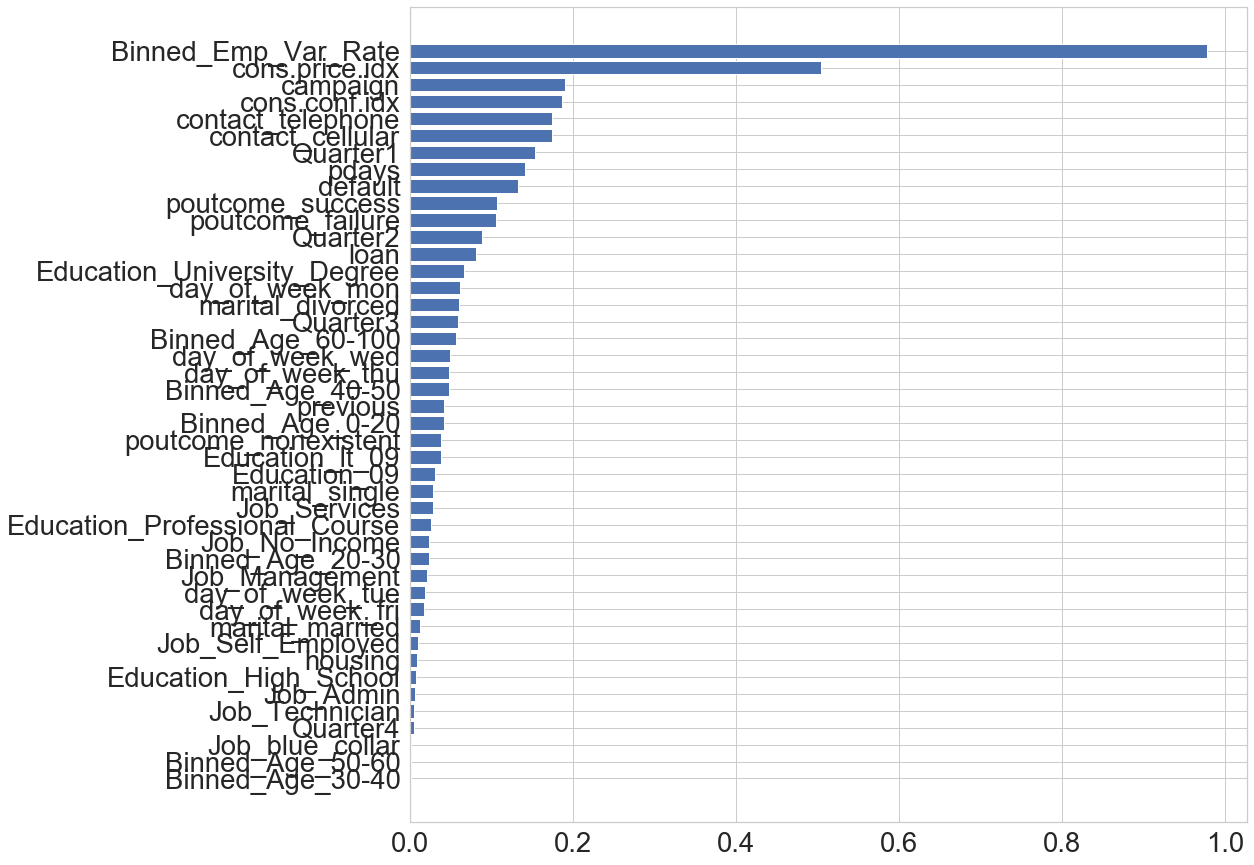

In [110]:
plt.figure(figsize=(15, 15))
features=X.columns
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

f_importances(abs(svm_best_clf_cv.coef_[0]), features)

<B>Summary

We tried number of combinations of models w.r.t. different techniques we could use for modelling process. This notebook is with decreased length with only best model performed. Results of different models we tried and their results are as below:

In [111]:
df1=pd.read_excel('Results.xlsx')
df1

,Algorithm,Data Scaled,Reduced Feature,Imbalanced Data,Threshold,Precision for Yes,Recall for Yes,F1 Score,AUC Score
0,Random Forest,No,No,Yes,Default,0.56,0.29,0.39,NaN
1,KNN,No,No,Yes,NaN,0.55,0.28,0.37,NaN
2,Logistic Regression,No,No,Yes,Default,0.67,0.21,0.32,0.81
3,Logistic Regression,No,No,Yes,0.2,0.46,0.55,0.50,0.80
4,Random Forest,Yes,No,Yes,Default,0.56,0.30,0.39,NaN
5,KNN,Yes,No,Yes,NaN,0.51,0.30,0.38,NaN
6,Logistic Regression,Yes,No,Yes,Default,0.71,0.23,0.35,0.81
7,Logistic Regression,Yes,No,Yes,0.2,0.45,0.60,0.51,0.81
8,SVM,Yes,No,Yes,NaN,0.65,0.19,0.30,NaN
9,Ridge Regression,Yes,No,Yes,NaN,0.70,0.21,0.33,NaN


# Conclusion

Our best performed model SVM . This classifier could achive accuracy rate 0.80. For such problems, along with accuracy score, recall and F1 score plays very important role for true values. Our model is able to successfully identify 68% of true postives, which could lead to identiy only those potential customers who are more likely to convert. This could result into campaign cost optimization 

# Recommendations

To optimize Campaign, there is need to <B>concentrate on those consumer groups that are potentially more promising</B>. Most important factors that responsible to for customer to subscribe product are:<br>
    <ul><li>Finalcial Factors 
        <ul><li>Employee Variation Rate at the time of campaign for the customer category
             <li>Consumer Price Index at the time of campaign for the customer category
       <li>Consumer Confidence Index at the time of campaign for the customer category
    </ul>
    <li>Previous Cotacts done to Customer
    <li>Time of the year (Querter 1 seems to be more effective)
    

<B>Appendices

In [77]:
X=df.drop(['y','emp.var.rate'], axis=1)
y=df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

<H3><B>Fit the Data without scaling the data and check the accuracy</B></H3> 
<ul><li>Random Forest(As Random Forest does not depends on scaling of the data)
    <li>KNN
    <li>Logistic Regression 

<B>Random Forest(Unscaled Data)

In [78]:
#Fit Random Forest Algorithm on Training Data
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
#Predict the result for testing data
y_pred=rand_clf.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score without scaling the data and using Random Forest',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using Random Forest 0.8971298944669099


In [79]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using Random Forest\n',cm)

Confusion Matrix without scaling the data and using Random Forest
 [[8758  258]
 [ 785  338]]


In [80]:
print('Classifiaction Report without scaling the data and using Random Forest\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using Random Forest
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9016
           1       0.57      0.30      0.39      1123

    accuracy                           0.90     10139
   macro avg       0.74      0.64      0.67     10139
weighted avg       0.88      0.90      0.88     10139



<B> KNN(Unscaled Data)

In [81]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('Accuracy Score without scaling the data and using KNN',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using KNN 0.8946641680639116


In [82]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using KNN\n',cm)

Confusion Matrix without scaling the data and using KNN
 [[8752  264]
 [ 804  319]]


In [83]:
print('Classifiaction Report without scaling the data and using KNN\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using KNN
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9016
           1       0.55      0.28      0.37      1123

    accuracy                           0.89     10139
   macro avg       0.73      0.63      0.66     10139
weighted avg       0.88      0.89      0.88     10139



<B>Logistic Regression(Unscaled Data)

In [84]:
lr_clf = LogisticRegression(max_iter=1000)
# Fit the model on the trainng data.
lr_clf.fit(X_train, y_train)
y_pred=lr_clf.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score without scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using Logistic Regression 0.9009764276555874


In [85]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using Logistic Regression\n',cm)

Confusion Matrix without scaling the data and using Logistic Regression
 [[8900  116]
 [ 888  235]]


In [86]:
print('Classifiaction Report without scaling the data and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using Logistic Regression
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9016
           1       0.67      0.21      0.32      1123

    accuracy                           0.90     10139
   macro avg       0.79      0.60      0.63     10139
weighted avg       0.88      0.90      0.88     10139



<B>Get the Roc curve for the results

AUC: 0.8066500555853608


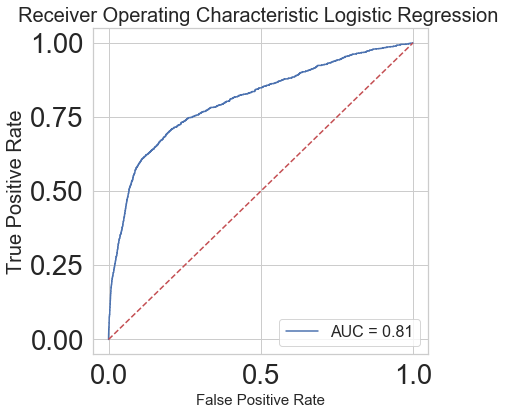

In [87]:
fig, ax = plt.subplots(figsize = (6,6))
probs = lr_clf.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))
plt.subplots_adjust(wspace=1)

Here ROC curve telling what will TPR and FPR w.r.t threshold for this model. Here I am creating ROC to get sence what will could be my possible threshold as I am more interested in improving TPR(Recall). I think ROC curve is not directly related to my decision matrix but still checking it is appropriate here as I want to understand how FPR will be affected if I try to increase TPR. And I see here if I use threshold less than 0.2 FPR will also increase.  

Logistic: f1=0.319 auc=0.456


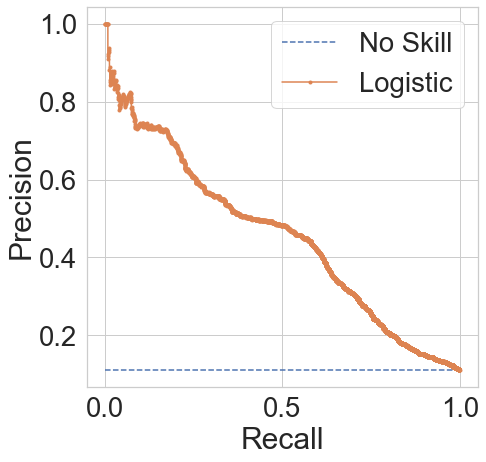

In [88]:
lr_probs=lr_clf.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [89]:
#Adjust the threshold to 0.20
THRESHOLD = 0.20
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
# Print the accuracy from the testing data.
print('Accuracy Score without scaling the data and using Logistic Regression with updated threshold',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using Logistic Regression with updated threshold 0.8751356149521649


<span style="color:red">
Comment: same as above </span><br> Here precision-recall curve is telling what will be the precison and recall score w.r.t to threshold. For this problem above curve is directly realted to decision matrix therefore checking this cureve is appropriate here. Reffereing above curve we can adjust threshold accordingly. Here intension to check Accuracy Score is get idea of exact what percent of data is classified correctly. 

In [90]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using Logistic Regression with updated threshold\n',cm)

Confusion Matrix without scaling the data and using Logistic Regression with updated threshold
 [[8242  774]
 [ 492  631]]


In [91]:
print('Classifiaction Report without scaling the data and using Logistic Regression with updated threshold\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using Logistic Regression with updated threshold
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      9016
           1       0.45      0.56      0.50      1123

    accuracy                           0.88     10139
   macro avg       0.70      0.74      0.71     10139
weighted avg       0.89      0.88      0.88     10139



<B>For this project it is important to have good recall and F1 score. Therefore there is need to improve recall score</B>

<span style="color:red">
Comment: I suggest you expand on this topic above, and more importantly, put it at the beginning before you create any of the models. Identifying appropriate performance metrics is one of the most essential step in a real world data science problem. You should write about 1) what is the problem type 2) What is the end goal of this project 3) What are the suitable metrics for achieving that end goal, how does getting a good performance against such a metric help solve your business problem.
Do not overlook these points as unimportant!!
    
Also, at the end, state cleary what you infer from precision-recall curve, ROC curve, and what value of threshold you selected. These should flow as a good story. At the moment I'm not able to understand anything easily. I couldn't find what threshold you used or how you arrived at it

<span style="color:red">
Comment: comments above are applicable to all the modelling related portions below.

<B>Scaled Data

<B>Logistic Regression with Scaled Data

In [93]:
lr_clf1 = LogisticRegression(max_iter=1000)
# Fit the model on the trainng data.
lr_clf1.fit(X_train, y_train)
y_pred=lr_clf1.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score with scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score with scaling the data and using Logistic Regression 0.904428444619785


In [94]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix with scaling the data and using Logistic Regression\n',cm)

Confusion Matrix with scaling the data and using Logistic Regression
 [[8909  107]
 [ 862  261]]


In [95]:
print('Classifiaction Report with scaling the data and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report with scaling the data and using Logistic Regression
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9016
           1       0.71      0.23      0.35      1123

    accuracy                           0.90     10139
   macro avg       0.81      0.61      0.65     10139
weighted avg       0.89      0.90      0.88     10139



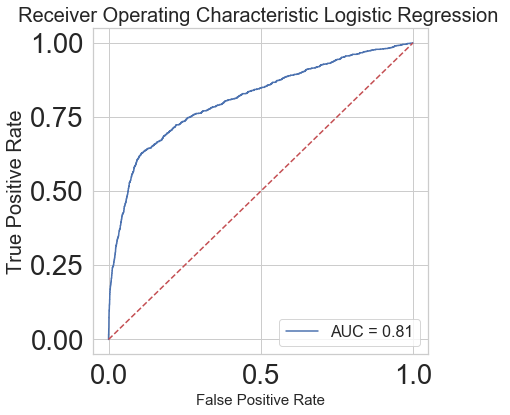

In [96]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
probs = lr_clf1.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [97]:
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))

AUC: 0.8109861680550496


Logistic: f1=0.350 auc=0.485


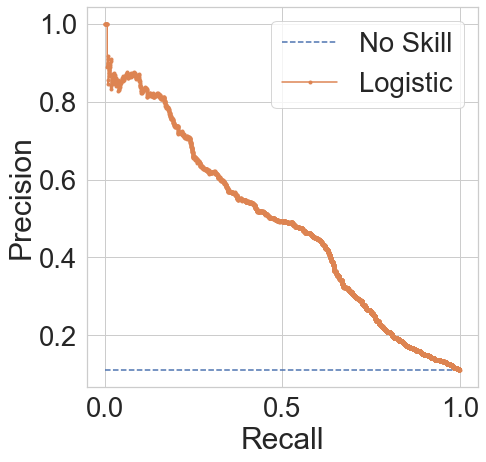

In [98]:
lr_probs=lr_clf1.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [99]:
THRESHOLD = 0.20
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf1.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after scaling the data and using logistic regression',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred)
print('Logistic Regression: f1-score=%.3f' % (f1))

Accuracy Score by after scaling the data and using logistic regression 0.8733602919420062
Logistic Regression: f1-score=0.513


In [100]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8179  837]
 [ 447  676]]


In [101]:
print('Classification Report after scaling the data and using Logistic regression\n',classification_report(y_test, y_pred))

Classification Report after scaling the data and using Logistic regression
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      9016
           1       0.45      0.60      0.51      1123

    accuracy                           0.87     10139
   macro avg       0.70      0.75      0.72     10139
weighted avg       0.89      0.87      0.88     10139



<H3>Still there is need to improve Recall Score and F1 Score for the models. There is need to balance data<H3>    

<B>For Balancing data we will use class weight method. Once done we will use below algorithms. As heren
    <ul><li>Random Forest
    <li>Logistic Regression 
    <li>SVM  
    <li>Ridge Rigression 
    <li>XG Boost

In [106]:
#Balance the class weight
classes=[1,0]
weights = compute_class_weight('balanced', classes, y=y_train)
weights

C:\Users\Pranay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([4.4272198 , 0.56365827])

<span style="color:red">
Comment: Ideally feature importance should have come up from the first model you built. You should then build a model with only the most important features, and see how much of a difference in performance metrics it makes. Smaller the features, less complex the model ;) </span><br> Sure, point taken.

<B>Logistic Regression (updated class weight) </B>

In [107]:
lr_clf2 = LogisticRegression(class_weight={0:0.56365827,1:4.4272198},max_iter=1000)
# Fit the model on the trainng data.
lr_clf2.fit(X_train, y_train)
y_pred=lr_clf2.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score with scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score with scaling the data and using Logistic Regression 0.8247361672748792


In [108]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

Confusion Matrix after updating class weight and using Logistic Regression
 [[7612 1404]
 [ 373  750]]


In [109]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.84      0.90      9016
           1       0.35      0.67      0.46      1123

    accuracy                           0.82     10139
   macro avg       0.65      0.76      0.68     10139
weighted avg       0.89      0.82      0.85     10139



<B>Plot Ruc Curve for Logistic Regression

AUC: 0.8118903684436336


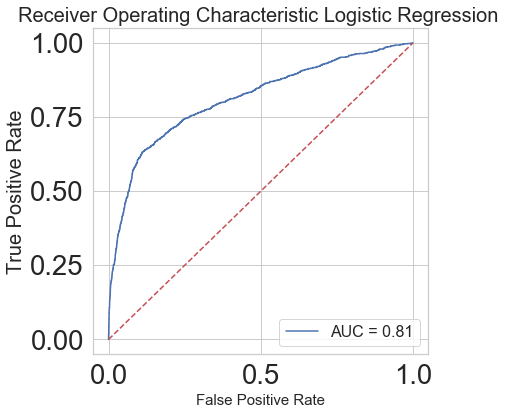

In [110]:
fig, ax = plt.subplots(figsize = (6,6))
probs = lr_clf2.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))
plt.subplots_adjust(wspace=1)

Logistic: f1=0.458 auc=0.481


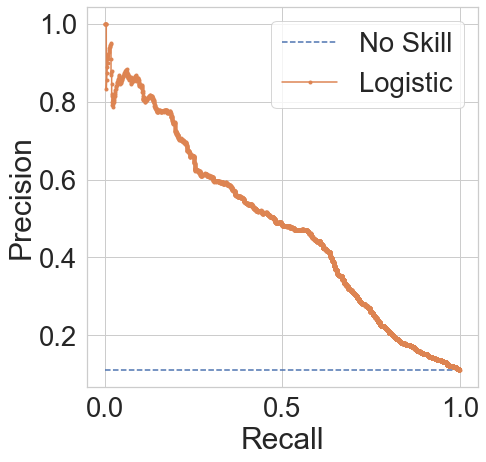

In [111]:
lr_probs=lr_clf2.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [112]:
#update the threshold and then predict the value
THRESHOLD = 0.65
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score by after balancing the data and using Logistic Regression 0.8719794851563271


In [113]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8171  845]
 [ 453  670]]


In [114]:
print('Classifiaction Report after balancing the data and using Logistic Regression\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Logistic Regression
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      9016
           1       0.44      0.60      0.51      1123

    accuracy                           0.87     10139
   macro avg       0.69      0.75      0.72     10139
weighted avg       0.89      0.87      0.88     10139



<B>SVM (updated class weight) </B>

In [115]:
clf_svm1 = svm(class_weight={0:0.56365827,1:4.4272198})
clf_svm1.fit(X_train, y_train)
y_pred=clf_svm1.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

Accuracy Score of SVM is 0.8468290758457442


In [116]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using SVM\n',cm)

Confusion Matrix after updating class weight and using SVM
 [[7935 1081]
 [ 472  651]]


In [117]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      9016
           1       0.38      0.58      0.46      1123

    accuracy                           0.85     10139
   macro avg       0.66      0.73      0.68     10139
weighted avg       0.88      0.85      0.86     10139



<B>OverSampling (We tried all models as below, but will show only those models which performed best)
    <ul><li>Random Forest
    <li>Logistic Regression 
    <li>SVM  
    <li>Ridge Rigression 
    <li>XG Boost

In [118]:
#In Oversampling size of data gets changed, therefore get initial value counts in y_train and take backup of the values
print(y_train.value_counts())
X_train1=X_train
y_train1=y_train

0    26980
1     3435
Name: y, dtype: int64


In [119]:
#TO balance data, update traing set with SMOTE method
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train,y_train)

In [120]:
#Get updated counts of the data
y_train.value_counts()

1    26980
0    26980
Name: y, dtype: int64

<B>SVM (Oversampling)

In [121]:
clf_svm1 = svm()
clf_svm1.fit(X_train, y_train)
y_pred=clf_svm1.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Accuracy Score of SVM is 0.7921885787553014
Confusion Matrix after updating class weight and using Logistic Regression
 [[7251 1765]
 [ 342  781]]
Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.80      0.87      9016
           1       0.31      0.70      0.43      1123

    accuracy                           0.79     10139
   macro avg       0.63      0.75      0.65     10139
weighted avg       0.88      0.79      0.82     10139



<H3><B>Undersampling (We tried all models as below, but will show only those models which performed best)
    <ul><li>Random Forest
    <li>Logistic Regression 
    <li>SVM  
    <li>Ridge Rigression 
    <li>XG Boost

In [122]:
y_train.value_counts()

1    26980
0    26980
Name: y, dtype: int64

In [123]:
X_train=X_train1
y_train=y_train1
y_train.value_counts()

0    26980
1     3435
Name: y, dtype: int64

In [124]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [125]:
y_train.value_counts()

1    3435
0    3435
Name: y, dtype: int64

<B>XG Boost (Undersampling)

In [129]:
gbc = XGBClassifier()
gbc.fit(X_train, y_train)
y_pred=gbc.predict(X_test)
print('Accuracy Score of Xgboost is',accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Xgboost\n',cm)

print('Classifiaction Report after balancing the data and using Xgboost\n',
      classification_report(y_test, y_pred))

Accuracy Score of Xgboost is 0.8243416510503995
Confusion Matrix after updating class weight and using Xgboost
 [[7600 1416]
 [ 365  758]]
Classifiaction Report after balancing the data and using Xgboost
               precision    recall  f1-score   support

           0       0.95      0.84      0.90      9016
           1       0.35      0.67      0.46      1123

    accuracy                           0.82     10139
   macro avg       0.65      0.76      0.68     10139
weighted avg       0.89      0.82      0.85     10139



In [130]:
y_train.value_counts()

1    3435
0    3435
Name: y, dtype: int64

In [131]:
X_train=X_train1
y_train=y_train1
y_train.value_counts()

0    26980
1     3435
Name: y, dtype: int64

<H3><B>Feature Reduction: Clubbing Features (We tried all models as below, but will show only those models which performed best)
    <ul><li>Random Forest
    <li>Logistic Regression 
    <li>SVM  
    <li>Ridge Rigression 
    <li>XG Boost

<h3>Logistic Regression</h3><br>
<b>For Logistic Regression we will use Scaled Data and "class weight" to balance data set

In [143]:
lr_clf2 = LogisticRegression(class_weight={0:0.56365827,1:4.4272198},max_iter=1000)
# Fit the model on the trainng data.
lr_clf2.fit(X_train, y_train)
y_pred=lr_clf2.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score with scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score with scaling the data and using Logistic Regression 0.8153664069434855


In [144]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

Confusion Matrix after updating class weight and using Logistic Regression
 [[7503 1513]
 [ 359  764]]


In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      9016
           1       0.34      0.68      0.45      1123

    accuracy                           0.82     10139
   macro avg       0.64      0.76      0.67     10139
weighted avg       0.89      0.82      0.84     10139



Logistic: f1=0.449 auc=0.481


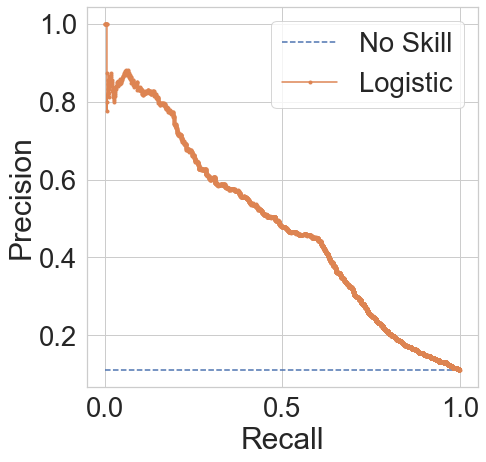

In [146]:
lr_probs=lr_clf2.predict_proba(X_test)[:,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall,lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall,lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [147]:
#update the threshold and then predict the value
THRESHOLD = 0.58
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

Accuracy Score by after balancing the data and using Random Forest 0.8688233553604892


In [148]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8124  892]
 [ 438  685]]


In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      9016
           1       0.43      0.61      0.51      1123

    accuracy                           0.87     10139
   macro avg       0.69      0.76      0.72     10139
weighted avg       0.89      0.87      0.88     10139



<h3>Hyper Parameter Tuning : We will apply the best models among all the techinques we used

<B>Before starting with hyperparameter tunnig let us sort variables we have for different approches

In [154]:
#X_train and y_train for clubbed features : X_train, y_train
#X_train and y_train for original features:X_train_bkp, y_train_bkp 

<B>Logistic Regression (Hyperparameter Tunnig)</B><br>
    For Logistic Regression model with clubbed features performed well, therefore we will implment hyperparameter tunnig on logistic regression and fit that data

In [155]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]
param_grid = {'C': Cs}
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(max_iter=1000,class_weight={0:0.56365827,1:4.4272198})
clf_cv=GridSearchCV(clf,param_grid,cv=5)
clf_cv.fit(X_train, y_train)
print("Tuned Logistic Regression Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1}
Best score is 0.8088443202367254


In [156]:
clf_best=LogisticRegression(C=1,max_iter=1000,class_weight={0:0.56365827,1:4.4272198})
clf_best.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 0.56365827, 1: 4.4272198},
                   max_iter=1000)

In [157]:
y_pred=clf_best.predict(X_test)
print('Accuracy Score of Final Logistic Regression Model is',accuracy_score(y_pred, y_test))

Accuracy Score of Final Logistic Regression Model is 0.8153664069434855


In [158]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Final Logistic Regression\n',cm)

Confusion Matrix for Final Logistic Regression
 [[7503 1513]
 [ 359  764]]


In [159]:
print('Classification Report for Final Logistic Regression Model is\n',classification_report(y_test, y_pred))

Classification Report for Final Logistic Regression Model is
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      9016
           1       0.34      0.68      0.45      1123

    accuracy                           0.82     10139
   macro avg       0.64      0.76      0.67     10139
weighted avg       0.89      0.82      0.84     10139



<B>Updating the threshold for Logistic Regression

In [160]:
THRESHOLD = 0.60
y_pred=clf_best.predict(X_test)
y_pred=np.where(clf_best.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)
f1 = f1_score(y_test, y_pred)
print('Logistic Regression: f1-score=%.3f' % (f1))

Confusion Matrix after updating class weight and using Logistic Regression
 [[8192  824]
 [ 450  673]]
Logistic Regression: f1-score=0.514


In [161]:
print('Classifiaction Report after updating class weight and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report after updating class weight and using Logistic Regression
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      9016
           1       0.45      0.60      0.51      1123

    accuracy                           0.87     10139
   macro avg       0.70      0.75      0.72     10139
weighted avg       0.89      0.87      0.88     10139

